## Table of Content

1. [Executive Summary](https://colab.research.google.com/drive/1D_WtBI_UrKPvIvw0544DcaWUZUGbDmXk#scrollTo=THnW6RPgLLf6)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)


5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary


***This project addresses a critical challenge facing our major Australian airline client: understanding passenger satisfaction drivers and competitive positioning within the aviation industry. With airline reviews directly impacting booking decisions and brand reputation, our client requires comprehensive insights into passenger sentiment patterns, service quality benchmarks, and operational improvement opportunities to maintain market leadership and drive customer loyalty. The project aims to leverage social media review data to identify specific service enhancement areas and strategic positioning opportunities that will improve customer satisfaction scores, increase recommendation rates, and strengthen market share against competitors.***

***Our methodology employed multi-dimensional analysis combining descriptive statistics, sentiment analysis, topic modeling, and temporal trend analysis across 50,000 airline reviews. We examined passenger feedback through cabin class differences, service category performance, geographic patterns, competitive benchmarking, and longitudinal performance trends. Advanced natural language processing techniques extracted actionable insights from unstructured review text, while statistical analysis revealed patterns in numerical ratings across entertainment, food quality, seat comfort, ground services, and overall satisfaction metrics.***

***The analysis reveals stark performance dichotomy in aviation, with profound strategic implications. Industry-wide satisfaction remains critically low (3.91/10 average) with predominantly negative sentiment (52.17% vs 46.30% positive), indicating widespread customer dissatisfaction that creates competitive opportunities for excellence-focused carriers. Top-performing airlines like Hainan Airlines, ANA, and China Southern maintain consistent high ratings (7-10 range) through premium service delivery, while bottom-tier carriers struggle with fundamental operational issues including baggage handling, delays, hidden fees, and staff training deficiencies.***

***Pemium carriers achieve superior ratings through focused service delivery. Topic modeling reveals passengers of top-rated airlines discuss premium experiences and service excellence, while bottom-rated airline customers focus on operational failures and basic service breakdowns.
Temporal analysis demonstrates reputation vulnerability, as illustrated by Qantas Airways' dramatic decline from 6-7 ratings to 1-3 following COVID-19 impacts, emphasizing crisis management importance. Critical service gaps exist industry-wide in WiFi infrastructure (0.67/5), entertainment systems (1.52/5), food quality (1.88/5), and seat comfort (2.43/5), representing improvement opportunities.***

***The data indicates sustainable competitive positioning requires consistent customer experience investment in operational fundamentals before pursuing premium differentiation strategies. With over 35,000 negative recommendations vastly outnumbering positive endorsements, systematic service improvements in operational reliability, transparent pricing, and staff training will yield greater returns than marketing efforts alone.***

***These insights directly support our client's strategic decision-making by identifying specific improvement priorities, competitive positioning opportunities, and customer experience investments. The analysis demonstrates that operational excellence and service consistency, rather than cost-cutting measures, drive sustainable competitive advantage in the Australian aviation market, providing a clear roadmap for enhancing satisfaction scores, recommendation rates, and market share.***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<a id = "cell_exploration"></a>
### 2. Data Exploration


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/a1/A1_dataset.csv")
seed = 224417348
my_df = df.sample(n=50000, random_state=seed)

#checking the shape of my dataset
print(my_df.shape)
print(my_df.head())

**Checking missing values:**

In [ ]:
#Checking for null values
my_df.isnull().sum()

,0
AirlineName,0
CabinType,0
DateFlown,0
EntertainmentRating,0
FoodRating,0
GroundServiceRating,0
OriginCountry,0
OverallScore,0
Recommended,0
Review,0


Since no missing values are found in the dataframe, we will not need to drop or impute any records.

**Cleaning Text**

In [ ]:
# Defining function for cleaning text
def preprocess(ReviewText):
    Review = ReviewText.str.replace("(<br/>)", "") #cleans line break tags </br>
    Review = ReviewText.str.replace('(<a).*(>).*(</a>)', '') #cleans anchor links
    Review = ReviewText.str.replace('(&amp)', '') #cleans HTML entity &amp
    Review = ReviewText.str.replace('(&gt)', '') #cleans HTML entity &gt
    Review = ReviewText.str.replace('(&lt)', '') #cleans HTML entity &lt
    Review = ReviewText.str.replace('(\xa0)', ' ') #cleans non-breaking spaces
    Review = ReviewText.str.replace(","," ") #replace comma with spaces
    return ReviewText

# Calling the function to clean text for Review column of the dataframe
my_df['Review'] = preprocess(my_df['Review'])

**Creating new columns for the length of the review**

In [ ]:
#New column created to count number of characters in each review
my_df['clean_length'] = my_df['Review'].astype(str).apply(len)

#New column created to count number of words in each review
my_df['no_of_words'] = my_df['Review'].apply(lambda x: len(str(x).split()))
print(my_df.shape)

(50000, 19)


In [ ]:
#Describing the new dataframe

my_df.describe()

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating,unique_id,clean_length,no_of_words
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.519580,1.882780,2.313080,3.913940,2.432680,2.669640,2.442760,0.668180,37016.204720,799.239340,145.967340
std,1.738792,1.743531,1.626245,3.413216,1.546168,1.707396,1.591683,1.250499,21379.936815,565.565465,105.184939
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,18490.750000,410.000000,74.000000
50%,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,0.000000,37089.500000,637.000000,116.000000
75%,3.000000,3.000000,4.000000,7.000000,4.000000,4.000000,4.000000,1.000000,55565.500000,1002.000000,184.000000
max,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000,5.000000,74000.000000,5306.000000,999.000000


***The dataset consists of 50,000 airline reviews with various numeric ratings and text-based information. The average overall score given by passengers is 3.91 out of 10, indicating generally low satisfaction. Ratings for individual service aspects are also modest, with in-flight entertainment (1.52), food (1.88), and seat comfort (2.43) receiving particularly low averages out of 5. Ground service (2.31), service quality (2.67), and value for money (2.44) show slightly better ratings, though still below average. Notably, WiFi quality averages just 0.67, reflecting a major gap in customer experience. The review texts vary in length, with a median of 116 words and up to 999 words in some cases, suggesting rich detail for text analysis.***

**Plots  and Analysis**

In [ ]:
#loading matplot and seaborne library

from matplotlib import pyplot as plt
import seaborn as sns

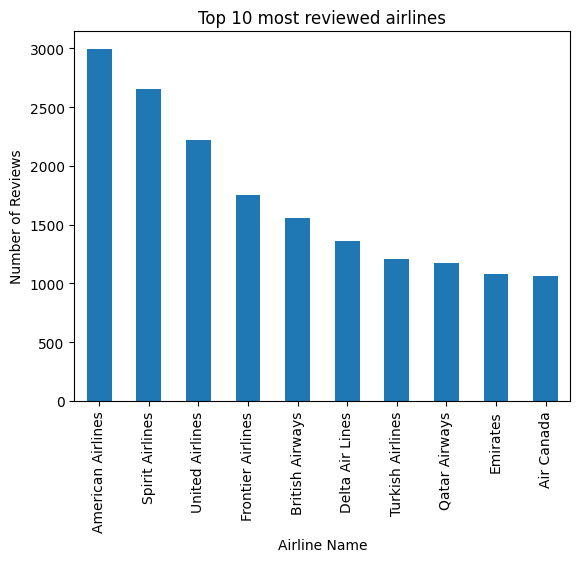

In [ ]:
# Top 10 airlines by number of reviews
my_df['AirlineName'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 most reviewed airlines')
plt.xlabel('Airline Name')
plt.ylabel('Number of Reviews')
plt.show()

/tmp/ipython-input-2624696366.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating, x='OverallScore', y='AirlineName', palette='viridis')


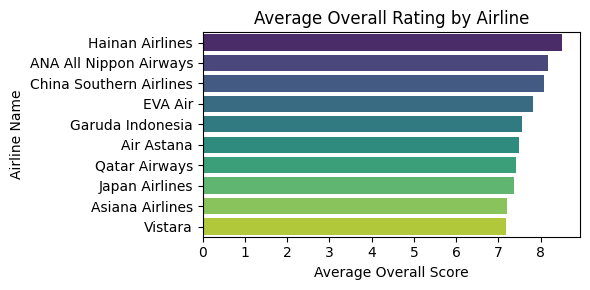

In [ ]:
#Average ratings by Airlines

#grouping by airline and calculating the average overall rating
avg_rating = my_df.groupby('AirlineName')['OverallScore'].mean().reset_index()

#sorting by average rating
avg_rating = avg_rating.sort_values(by='OverallScore', ascending=False).head(10)

#plotting the result
plt.figure(figsize=(6, 3))
sns.barplot(data=avg_rating, x='OverallScore', y='AirlineName', palette='viridis')
plt.title('Top 10 highest rated airlines')
plt.xlabel('Average Overall Score')
plt.ylabel('Airline Name')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3836923639.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating, x='OverallScore', y='AirlineName', palette='viridis')


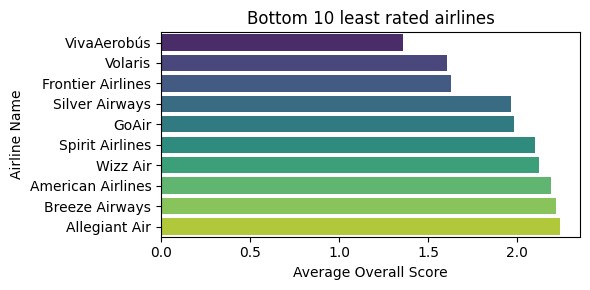

In [ ]:
#Average ratings by Airlines

#grouping by airline and calculating the average overall rating
avg_rating = my_df.groupby('AirlineName')['OverallScore'].mean().reset_index()

#sorting by average rating
avg_rating = avg_rating.sort_values(by='OverallScore', ascending=True).head(10)

#plotting the result
plt.figure(figsize=(6, 3))
sns.barplot(data=avg_rating, x='OverallScore', y='AirlineName', palette='viridis')
plt.title('Bottom 10 least rated airlines')
plt.xlabel('Average Overall Score')
plt.ylabel('Airline Name')
plt.tight_layout()
plt.show()

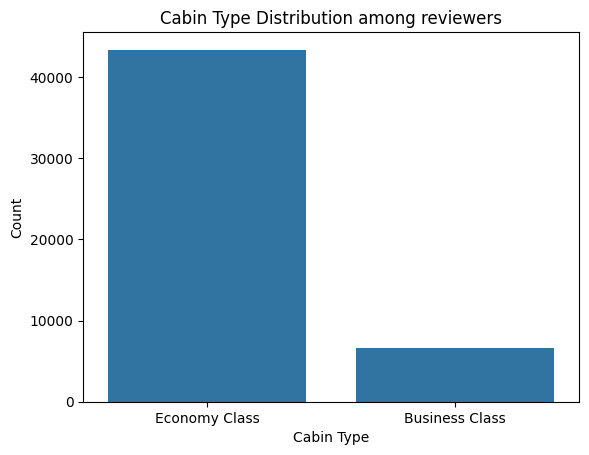

In [ ]:
# CabinType
sns.countplot(x='CabinType', data=my_df)
plt.title('Cabin Type Distribution among reviewers')
plt.xlabel('Cabin Type')
plt.ylabel('Count')
plt.show()

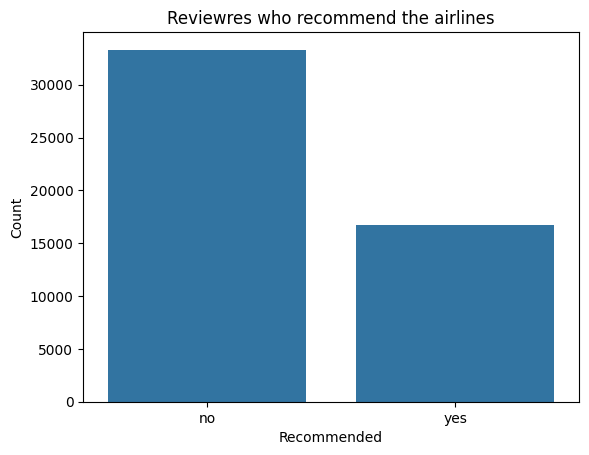

In [ ]:
# Recommended
sns.countplot(x='Recommended', data=my_df)
plt.title('Reviewres who recommend the airlines')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.show()

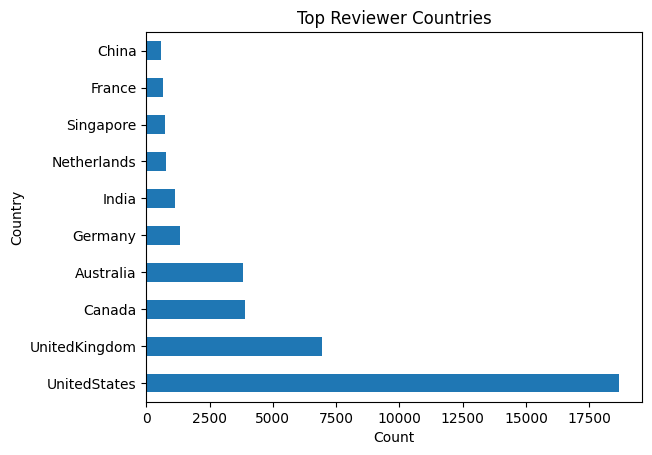

In [ ]:
# OriginCountry (top 10)
my_df['OriginCountry'].value_counts().nlargest(10).plot(kind='barh', title='Top Reviewer Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

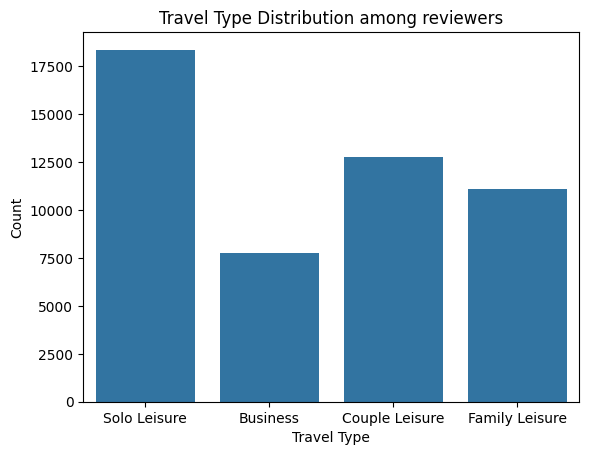

In [ ]:
# TravelType
sns.countplot(x='TravelType', data=my_df)
plt.title('Travel Type Distribution among reviewers')
plt.xlabel('Travel Type')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='OverallScore', ylabel='Count'>

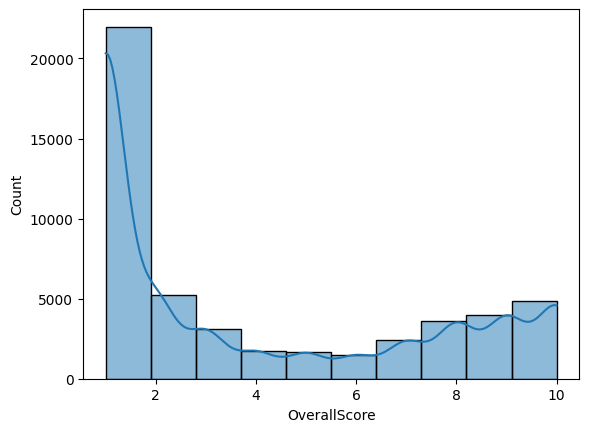

In [ ]:
# Histogram of Overall Score
sns.histplot(my_df['OverallScore'], bins=10, kde=True)

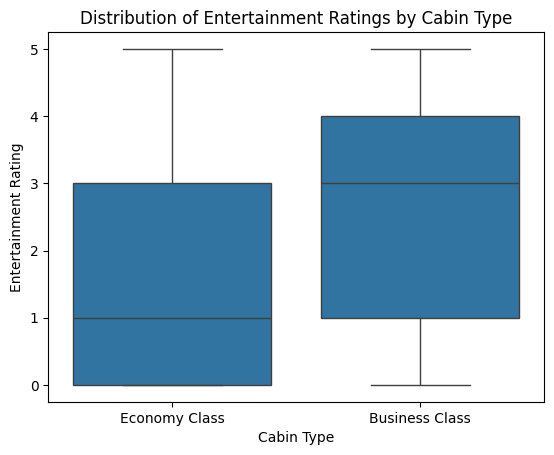

In [ ]:
# Boxplot of EntertainmentRating by CabinType
sns.boxplot(x='CabinType', y='EntertainmentRating', data=my_df)
plt.title('Distribution of Entertainment Ratings by Cabin Type')
plt.xlabel('Cabin Type')
plt.ylabel('Entertainment Rating')
plt.show()

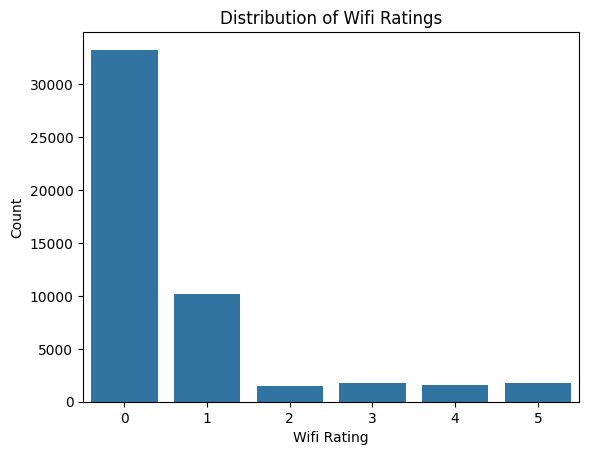

In [ ]:
# Count of WifiRating
sns.countplot(x='WifiRating', data=my_df)
plt.title('Distribution of Wifi Ratings')
plt.xlabel('Wifi Rating')
plt.ylabel('Count')
plt.show()

***Summary of EDA: The exploratory data analysis of airline reviews reveals significant patterns across multiple dimensions of passenger feedback. The dataset shows clear volume disparities, with American Airlines, Spirit, United, and Frontier generating the highest review counts, while premium carriers like Hainan Airlines, ANA All Nippon, and China Southern achieve the highest average ratings despite fewer total reviews. Conversely, budget carriers Viva Aerobus, Volaris, and Frontier consistently rank among the lowest-rated airlines. The class distribution is heavily skewed toward economy passengers, with over 40,000 economy reviews compared to fewer than 10,000 business class entries, creating a substantial representation gap. Geographic patterns show concentrated feedback from English-speaking markets, with the United States, United Kingdom, and Canada leading reviewer origins, followed by Australia, Germany, India, and the Netherlands. Travel purpose analysis indicates solo leisure travel dominates the dataset, followed by couple leisure, family leisure, and business travel categories. The recommendation patterns are particularly striking, with over 35,000 negative recommendations vastly outnumbering fewer than 20,000 positive endorsements, suggesting widespread passenger dissatisfaction. Overall rating distributions demonstrate a pronounced negative skew, with scores of 1 and 2 being most frequent, though some perfect 10 ratings exist. Entertainment ratings reveal a substantial class-based service gap, with business class passengers reporting significantly higher satisfaction than economy travelers, highlighting systematic disparities in onboard amenities and potentially biasing any predictive models toward class-based sentiment assumptions.***

**A. Identify the top 10 airlines based on the overall rating across various cabin types. Do these airlines
consistently rank in the top 10 for entertainment, food and ground services as well? Highlight any
differences and discuss possible reasons for these variations. Does “Qantas Airways” or “Jetstar
Airways” appear in any of the above top 10 lists? Additionally, your client would like to know whether
“Qantas Airways” or “Jetstar Airways” is one of the most recommended (top 10) or the least
recommended (bottom 10) airlines for any cabin type.**  

In [ ]:
# 1. Top 10 airlines in Business Class based on overall score
# To identify the top-rated airlines in Business Class, I calculated the average OverallScore and selected the top 10.
top10_overall_business = (
    my_df[my_df['CabinType'] == 'Business Class']
    .groupby('AirlineName')['OverallScore']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# 2. Top 10 airlines in Economy Class based on overall score
# For Economy Class, I repeated the same process to observe how airline rankings vary between cabin types.
top10_overall_economy = (
    my_df[my_df['CabinType'] == 'Economy Class']
    .groupby('AirlineName')['OverallScore']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# 3. Top 10 airlines in Business Class based on entertainment
# This helped me compare whether the top overall performers also deliver well in Entertainment services in Business Class.
top10_entertainment_business = (
    my_df[my_df['CabinType'] == 'Business Class']
    .groupby('AirlineName')['EntertainmentRating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# 4. Top 10 airlines in Economy Class based on entertainment
# I conducted the same for Economy Class to contrast the quality of entertainment offerings.
top10_entertainment_economy = (
    my_df[my_df['CabinType'] == 'Economy Class']
    .groupby('AirlineName')['EntertainmentRating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# 5. Top 10 airlines in Business Class based on food
# I also evaluated food service ratings for Business Class to examine consistency in service dimensions.
top10_food_business = (
    my_df[my_df['CabinType'] == 'Business Class']
    .groupby('AirlineName')['FoodRating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# 6. Top 10 airlines in Economy Class based on food
# For Economy, the top airlines were identified for food service as well, highlighting class-wise variations.
top10_food_economy = (
    my_df[my_df['CabinType'] == 'Economy Class']
    .groupby('AirlineName')['FoodRating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# 7. Top 10 airlines in Business Class based on ground services
# I then analyzed ratings for ground services to understand which airlines provide smooth travel experiences before boarding.
top10_ground_business = (
    my_df[my_df['CabinType'] == 'Business Class']
    .groupby('AirlineName')['GroundServiceRating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# 8. Top 10 airlines in Economy Class based on ground services
# This also included the Economy Class to see if budget class travelers also receive good ground support.
top10_ground_economy = (
    my_df[my_df['CabinType'] == 'Economy Class']
    .groupby('AirlineName')['GroundServiceRating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)


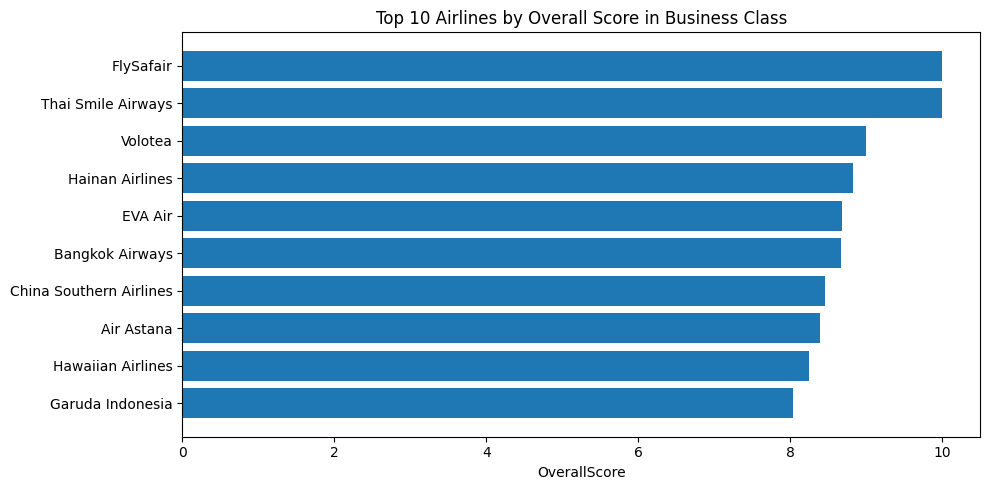

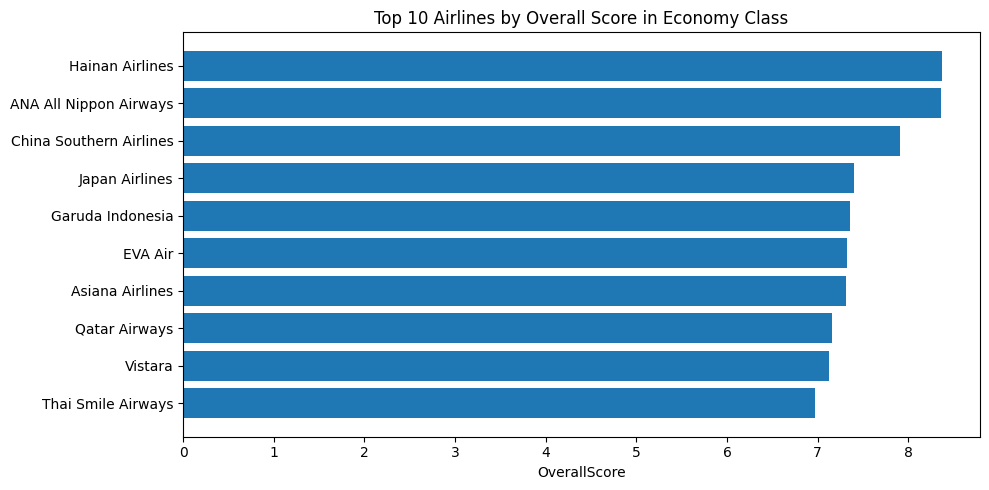

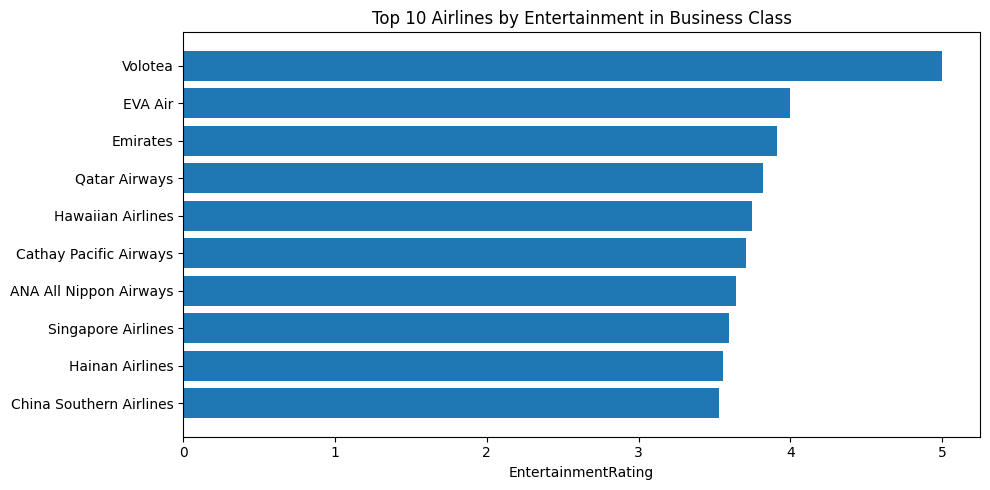

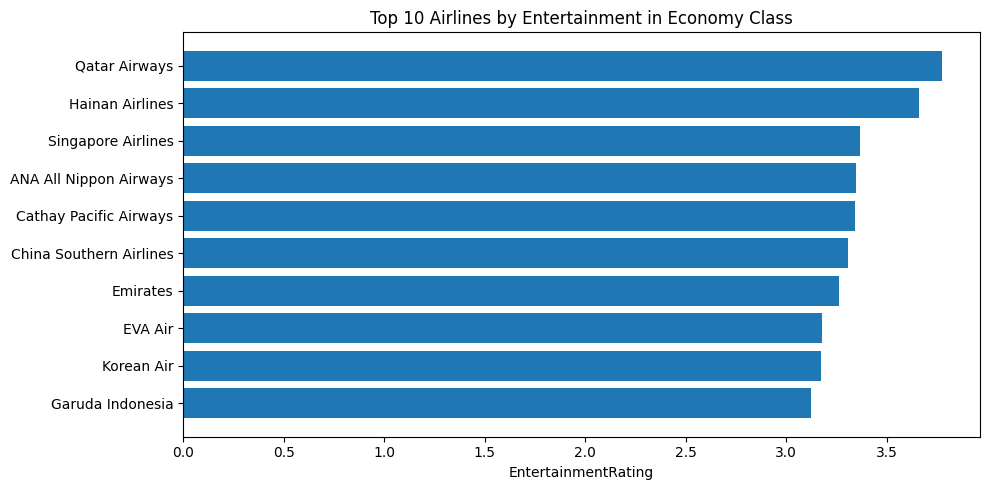

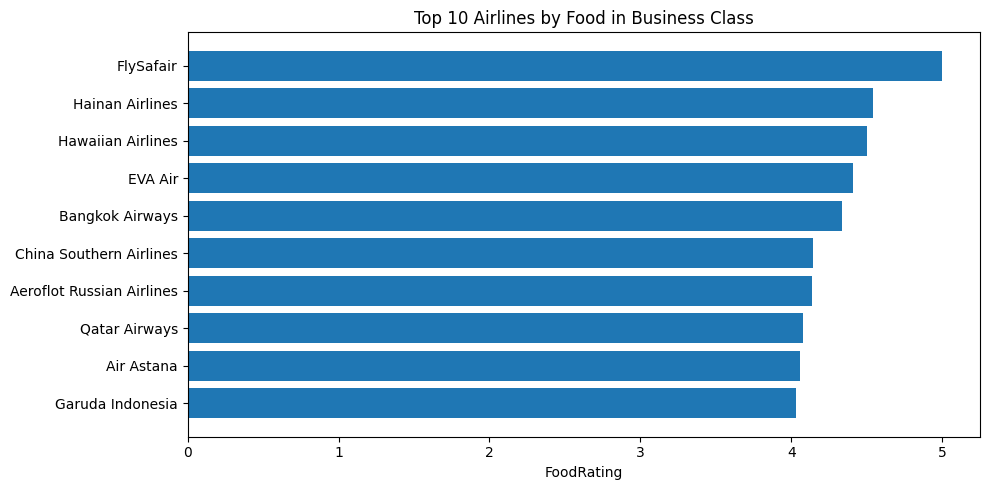

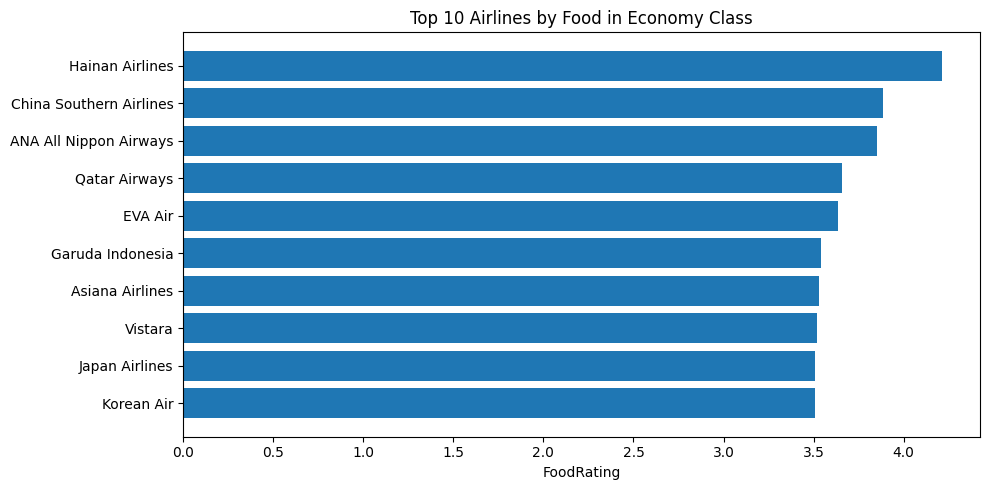

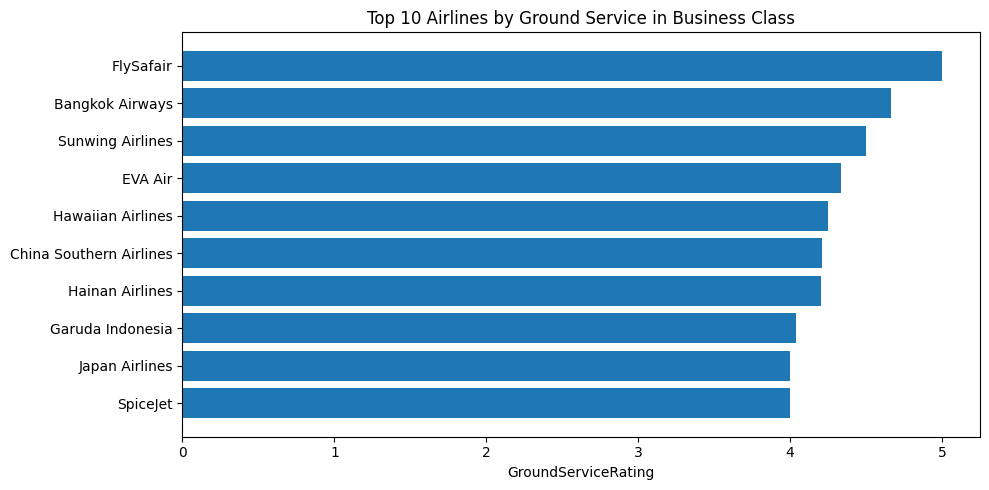

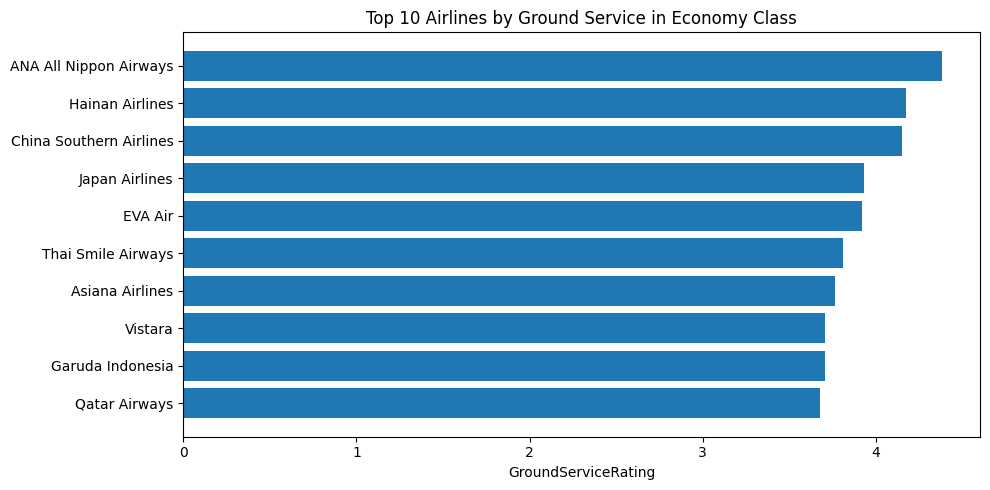

In [ ]:
import matplotlib.pyplot as plt

# List of tuples: (rating column, cabin type, chart title)
combinations = [
    ('OverallScore', 'Business Class', 'Top 10 Airlines by Overall Score in Business Class'),
    ('OverallScore', 'Economy Class', 'Top 10 Airlines by Overall Score in Economy Class'),
    ('EntertainmentRating', 'Business Class', 'Top 10 Airlines by Entertainment in Business Class'),
    ('EntertainmentRating', 'Economy Class', 'Top 10 Airlines by Entertainment in Economy Class'),
    ('FoodRating', 'Business Class', 'Top 10 Airlines by Food in Business Class'),
    ('FoodRating', 'Economy Class', 'Top 10 Airlines by Food in Economy Class'),
    ('GroundServiceRating', 'Business Class', 'Top 10 Airlines by Ground Service in Business Class'),
    ('GroundServiceRating', 'Economy Class', 'Top 10 Airlines by Ground Service in Economy Class'),
]

# Generate horizontal bar plots for each combination
for rating_col, cabin, title in combinations:
    top10_df = get_top10(my_df, rating_col, cabin)  # uses your previously defined get_top10()
    plt.figure(figsize=(10, 5))
    plt.barh(top10_df['AirlineName'], top10_df[rating_col])
    plt.xlabel(rating_col)
    plt.title(title)
    plt.gca().invert_yaxis()  # So highest rating appears at the top
    plt.tight_layout()
    plt.show()


In [ ]:
#checking if Quantas and Jetstar airways belong to any above top 10 lists

# defining the airlines of interest
target_airlines = {'Qantas Airways', 'Jetstar Airways'}

# creating sets for each top 10 list
top10_overall_set = set(top10_overall['AirlineName'])
top10_entertainment_set = set(top10_entertainment['AirlineName'])
top10_food_set = set(top10_food['AirlineName'])
top10_ground_set = set(top10_ground['AirlineName'])

# Function to return result or None
def check_presence(top10_set):
    result = target_airlines & top10_set
    return result if result else None

# Checking and printing results
print("Qantas/Jetstar in top10_overall:", check_presence(top10_overall_set))
print("Qantas/Jetstar in top10_entertainment:", check_presence(top10_entertainment_set))
print("Qantas/Jetstar in top10_food:", check_presence(top10_food_set))
print("Qantas/Jetstar in top10_ground:", check_presence(top10_ground_set))

Qantas/Jetstar in top10_overall: None
Qantas/Jetstar in top10_entertainment: None
Qantas/Jetstar in top10_food: None
Qantas/Jetstar in top10_ground: None


In [ ]:
#checking top and bottom 10 airlines based on recommendation

# Converting 'Recommended' to binary values
my_df['RecommendedBinary'] = my_df['Recommended'].map({'yes': 1, 'no': 0})

# Calculating recommendation rate for each Airline & CabinType
rec_rate = my_df.groupby(['AirlineName', 'CabinType'])['RecommendedBinary'].mean().reset_index()

# Sorting and displaying top 10 most recommended per cabin type
print("Top 10 Most Recommended Airlines by Cabin Type:")
top10 = rec_rate.groupby('CabinType').apply(lambda x: x.nlargest(10, 'RecommendedBinary')).reset_index(drop=True)
print(top10)

# Sorting and displaying bottom 10 least recommended per cabin type
print("Bottom 10 Least Recommended Airlines by Cabin Type:")
bottom10 = rec_rate.groupby('CabinType').apply(lambda x: x.nsmallest(10, 'RecommendedBinary')).reset_index(drop=True)
print(bottom10)


Top 10 Most Recommended Airlines by Cabin Type:
                AirlineName       CabinType  RecommendedBinary
0                 AirAsia X  Business Class           1.000000
1           Bangkok Airways  Business Class           1.000000
2                 FlySafair  Business Class           1.000000
3         Hawaiian Airlines  Business Class           1.000000
4                  Lion Air  Business Class           1.000000
5                  SpiceJet  Business Class           1.000000
6        Thai Smile Airways  Business Class           1.000000
7                   Volotea  Business Class           1.000000
8   China Southern Airlines  Business Class           0.947917
9           Hainan Airlines  Business Class           0.936508
10   ANA All Nippon Airways   Economy Class           0.889706
11  China Southern Airlines   Economy Class           0.885341
12          Hainan Airlines   Economy Class           0.873333
13         Garuda Indonesia   Economy Class           0.788546
14     

/tmp/ipython-input-283125982.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10 = rec_rate.groupby('CabinType').apply(lambda x: x.nlargest(10, 'RecommendedBinary')).reset_index(drop=True)
/tmp/ipython-input-283125982.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom10 = rec_rate.groupby('CabinType').apply(lambda x: x.nsmallest(10, 'RecommendedBinary')).reset_index(drop=True)


***Top 10 Airlines by Overall Rating Analysis:
The top performers vary significantly between cabin classes. In Business Class, HySafair leads followed by Thai Smile Airways and Volotea, while in Economy Class, Hainan Airlines tops the list followed by ANA All Nippon Airways and China Southern Airlines.***

***Consistency Across Service Categories:
These airlines show mixed consistency across different service metrics. Hainan Airlines, EVA Air, China Southern Airlines, and Garuda Indonesia appear consistently in top rankings across multiple categories. However, some overall rating leaders like HySafair don't appear in specific service category top 10s, suggesting their strength may lie in other unmeasured factors or overall experience rather than individual service components.***

***Reasons for Variations:
The differences likely stem from varying service quality emphasis - some airlines excel in specific areas (entertainment, food, ground service) while others provide more balanced overall experiences. Additionally, passenger expectations and sample sizes may differ between cabin classes, affecting relative rankings.***

***Qantas Airways and Jetstar Airways Presence:
Neither Qantas Airways nor Jetstar Airways appear in any of the top 10 lists for overall rating, entertainment, food, or ground services across both cabin classes shown in the charts.***

***Recommendation Status:
Based on the additional data provided, neither Qantas Airways nor Jetstar Airways appear in the top 10 most recommended airlines list. They also do not appear in the bottom 10 least recommended airlines list, suggesting they fall somewhere in the middle range for passenger recommendations.***

**B. How have overall passenger ratings for “Qantas Airways” changed over time compared to the top 5
rated airlines? Are there any noticeable trends or patterns in the variation of overall ratings over time
for “Qantas Airways” and the other top five-rated airlines? Discuss any possible factors that may have
influenced the above trends**

In [ ]:
# Identifying top 5 airlines based on average OverallScore
top5_airlines = my_df.groupby('AirlineName')['OverallScore'].mean().nlargest(5).index.tolist()
print(top5_airlines)

['Hainan Airlines', 'ANA All Nippon Airways', 'China Southern Airlines', 'EVA Air', 'Garuda Indonesia']


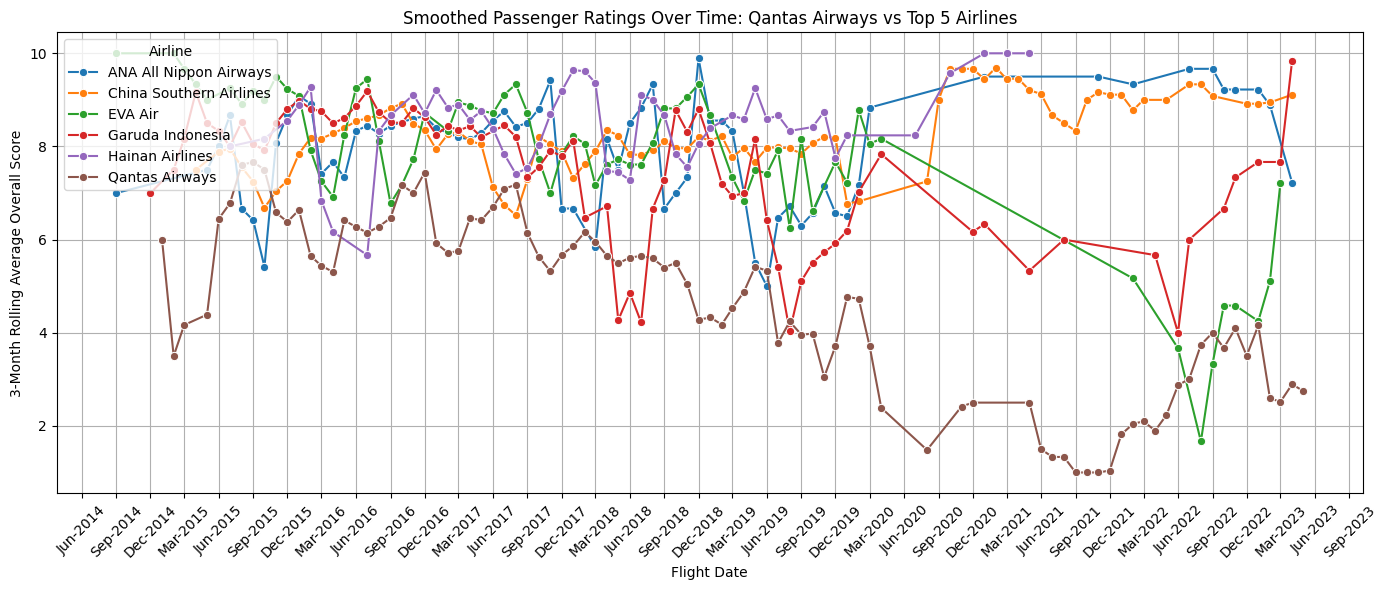

In [ ]:
import matplotlib.dates as mdates

# Adding 'Qantas Airways' for comparison as it is not in the top 5 list
top5_airlines = my_df.groupby('AirlineName')['OverallScore'].mean().nlargest(5).index.tolist()
top5_airlines.append('Qantas Airways')

# Converting 'DateFlown' to datetime format for easier time-based analysis
my_df['DateFlown'] = pd.to_datetime(my_df['DateFlown'], errors='coerce', format='%b-%y')

# Filtering data to include only the top 5 airlines and Qantas Airways
filtered_df = my_df[my_df['AirlineName'].isin(top5_airlines)].copy()

# Creating 'YearMonth' from 'DateFlown' and converting to datetime for better plotting
filtered_df['YearMonth'] = filtered_df['DateFlown'].dt.to_period('M').astype(str)
filtered_df['YearMonth_dt'] = pd.to_datetime(filtered_df['YearMonth'])

# Grouping by airline and date to calculate average overall score per month
trend_data = filtered_df.groupby(['AirlineName', 'YearMonth', 'YearMonth_dt'])['OverallScore'].mean().reset_index()

# Applying 3-month rolling average to smooth the rating trends
trend_data['RollingScore'] = trend_data.groupby('AirlineName')['OverallScore'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

# Plotting the smoothed average scores over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_data, x='YearMonth_dt', y='RollingScore', hue='AirlineName', marker='o')

# Formatting x-axis to show ticks every 3 months for better readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.xticks(rotation=45)

# Adding final labels, title, and layout settings
plt.title('Smoothed Passenger Ratings Over Time: Qantas Airways vs Top 5 Airlines')
plt.ylabel('3-Month Rolling Average Overall Score')
plt.xlabel('Flight Date')
plt.legend(title='Airline', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

***Qantas Airways Rating Trends Over Time:
Qantas Airways shows a clear declining trend from 2014 to 2023. The airline started with ratings around 6-7 in 2014-2015, maintained moderate performance around 4-6 through 2016-2019, then experienced a significant decline from 2020 onwards, with ratings dropping to consistently low levels of 1-3 by 2021-2023.***

***Comparison with Top 5 Airlines:
The top 5 airlines (ANA, China Southern, EVA Air, Garuda Indonesia, Hainan Airlines) maintain relatively stable high performance between 7-10 throughout the period, with some fluctuations but no sustained decline. In contrast, Qantas shows a dramatic divergence, particularly post-2020, creating an increasingly wide performance gap.***

***Notable Patterns:
Qantas exhibits high volatility with sharp rating swings, especially during 2018-2019, followed by a steep downward trajectory from 2020. The top-rated airlines show more consistent performance with occasional peaks and dips but maintain their quality standards over time.***

***Possible Influencing Factors:
The sharp decline from 2020 onwards likely correlates with COVID-19 impacts - flight cancellations, reduced service levels, staff shortages, and operational challenges. Qantas faced significant domestic travel restrictions and international border closures in Australia. Additionally, cost-cutting measures, fleet changes, industrial relations issues, and increased passenger expectations post-pandemic may have contributed to deteriorating service quality and customer satisfaction ratings.***

<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis


**C. Compare the overall sentiments expressed by customers about airlines. Which airline received the
most positive sentiments?**


---



<a id = "cell_sentiment"></a>
#### Lexicon based Sentiment Analysis

In [ ]:
# first, we import the relevant modules from the NLTK library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review
def get_sentiment_label(text):
    score = sid.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply compound score and sentiment label to dataframe
my_df['compound'] = my_df['Review'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
my_df['SentimentLabel'] = my_df['Review'].apply(get_sentiment_label)


In [ ]:
print(my_df.head())

In [ ]:
# Preview with true recommendation label
print(my_df[['Review', 'compound', 'SentimentLabel', 'Recommended']].head())
# Checking how many times sentiment and recommendation agree
agree = my_df[ (my_df['Recommended'] == 1) & (my_df['SentimentLabel'] == 'Positive') |
               (my_df['Recommended'] == 0) & (my_df['SentimentLabel'] == 'Negative') ]

print(f"Agreement between sentiment and recommendation: {len(agree)} out of {len(my_df)}")

In [ ]:
#checking the overall sentiment of the customers

overall_avg_compound = my_df['compound'].mean()
print(f"Overall average compound sentiment score: {overall_avg_compound:.4f}")

# Count of sentiment labels
sentiment_counts = my_df['SentimentLabel'].value_counts()
print("Sentiment label counts:")
print(sentiment_counts)

# Percentage of each sentiment label
sentiment_percent = my_df['SentimentLabel'].value_counts(normalize=True) * 100
print("\nSentiment label percentages:")
print(sentiment_percent.round(2))



Overall average compound sentiment score: -0.0212
Sentiment label counts:
SentimentLabel
Negative    26083
Positive    23152
Neutral       765
Name: count, dtype: int64

Sentiment label percentages:
SentimentLabel
Negative    52.17
Positive    46.30
Neutral      1.53
Name: proportion, dtype: float64


In [ ]:
#Finding airlines with most positive reviews

positive_counts = my_df[my_df['SentimentLabel'] == 'Positive'].groupby('AirlineName').size().sort_values(ascending=False)
print("Count of Positive Sentiments by Airline:\n")
print(positive_counts)


Count of Positive Sentiments by Airline:

AirlineName
United Airlines            954
Qatar Airways              953
American Airlines          908
Spirit Airlines            876
China Southern Airlines    870
                          ... 
GoAir                       29
Silver Airways              29
FlySafair                   28
VivaAerobús                 19
Breeze Airways              19
Length: 117, dtype: int64


***Overall Customer Sentiment Distribution:
The airline review dataset shows a predominantly negative sentiment landscape, with 52.17% of reviews classified as negative, 46.30% as positive, and only 1.53% as neutral. The overall average compound sentiment score of -0.0212 confirms this slight negative skew in customer opinions.***

***Airlines with Most Positive Sentiments:
Based on absolute counts of positive reviews, United Airlines leads with 954 positive sentiment reviews, followed closely by Qatar Airways (953), American Airlines (908), Spirit Airlines (876), and China Southern Airlines (870). However, these numbers likely reflect review volume rather than sentiment quality.***

***Key Observations:
The data reveals that high-volume airlines dominate the positive sentiment counts, which may be misleading as they also generate more total reviews. Airlines like United Airlines and American Airlines, despite having high positive review counts, may still have poor overall sentiment ratios. Meanwhile, smaller carriers like FlySafair (28 positive reviews), VivaAerobús (19), and Breeze Airways (19) show significantly lower positive sentiment volumes.***

***Analysis Limitation:
Without sentiment ratios or percentages per airline, it's difficult to determine which airline truly provides the best customer experience. The absolute positive count favors high-traffic carriers over potentially superior but smaller airlines that may have higher positive sentiment percentages but lower total review volumes.***

**D. Identify the airline that received the most positive sentiment for their Economy class and Business
Class “service/s”**

<a id = "cell_sentiment"></a>
#### Aspect Level based Sentiment Analysis

<a id = "cell_sentiment"></a>
#### Sentiment Summarization

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from statistics import mean
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('punkt_tab')

sid = SentimentIntensityAnalyzer()

def aspect_sentiment(aspect, sentences, scores):
    aspect_scores = []
    for i in range(len(sentences)):
        if aspect.lower() in sentences[i].lower():
            aspect_scores.append(scores[i]['compound'])
    return round(mean(aspect_scores), 3) if aspect_scores else None


In [ ]:
# Create an empty list to store aspect sentiment scores
service_aspect_scores = []

# Loop through each review
for review in my_df['Review']:
    if pd.isna(review):
        service_aspect_scores.append(None)
        continue
    review = review.replace(',', '.')  # Clean punctuation
    sents = sent_tokenize(review)
    scores = [sid.polarity_scores(s) for s in sents]
    score = aspect_sentiment('service', sents, scores)
    service_aspect_scores.append(score)

# Add service aspect score to dataframe
my_df['ServiceAspectScore'] = service_aspect_scores


In [ ]:
def score_to_label(score):
    if score is None:
        return None
    elif score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

my_df['ServiceAspectSentiment'] = my_df['ServiceAspectScore'].apply(score_to_label)

In [ ]:
econ_service = my_df[
    (my_df['ServiceAspectSentiment'] == 'Positive') &
    (my_df['CabinType'].str.lower() == 'economy class')
]

econ_counts = econ_service.groupby('AirlineName').size().sort_values(ascending=False)
print("Most positive 'service/services' sentiment in Economy Class:\n")
print(econ_counts)


Most positive 'service/services' sentiment in Economy Class:

AirlineName
American Airlines          286
United Airlines            272
China Southern Airlines    265
Qatar Airways              252
Spirit Airlines            192
                          ... 
GoAir                        5
Breeze Airways               4
Silver Airways               4
El Al Israel Airlines        3
VivaAerobús                  2
Length: 117, dtype: int64


In [ ]:
bus_service = my_df[
    (my_df['ServiceAspectSentiment'] == 'Positive') &
    (my_df['CabinType'].str.lower() == 'business class')
]

bus_counts = bus_service.groupby('AirlineName').size().sort_values(ascending=False)
print("\nMost positive 'service/services' sentiment in Business Class:\n")
print(bus_counts)



Most positive 'service/services' sentiment in Business Class:

AirlineName
Qatar Airways              208
British Airways            166
China Southern Airlines    119
Emirates                    90
Lufthansa                   84
                          ... 
Ryanair                      1
AirAsia X                    1
SpiceJet                     1
Volaris                      1
WestJet Airlines             1
Length: 92, dtype: int64


***Economy Class Most Positive Service Sentiment:
American Airlines leads in Economy Class with 286 positive service-related sentiment mentions, followed by United Airlines (272), China Southern Airlines (265), Qatar Airways (252), and Spirit Airlines (192). This indicates that despite overall mixed reviews, American Airlines generates the highest volume of positive service feedback in economy class.***

***Business Class Most Positive Service Sentiment:
Qatar Airways dominates Business Class with 208 positive service sentiment mentions, significantly ahead of British Airways (166), China Southern Airlines (119), Emirates (90), and Lufthansa (84). This aligns with Qatar Airways' reputation as a premium carrier known for exceptional business class service quality.***

***These rankings reflect absolute counts rather than sentiment ratios, so they may favor airlines with higher review volumes. However, the significant gaps (Qatar Airways' 208 vs. competitors' lower counts in business class) suggest genuine service quality differences, particularly for premium cabin experiences.***

<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling



**E. What are the concerns and interests of passengers when flying with an airline?**

**For overall airline reviews**

In [ ]:
# Data cleaning and removing stop words
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
import re

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Store cleaned reviews
Cleaned_doc = []

# Loop through reviews in my_df
for review in my_df['Review']:
    try:
        # Remove non-alphabet characters
        review = re.sub('[^A-Za-z]', ' ', review)
        # Lowercase
        review = review.lower()
        # Tokenize
        tokens = review.split()
        # Remove short words
        tokens = [w for w in tokens if len(w) > 3]
        # Remove stopwords
        filtered_tokens = [w for w in tokens if w not in stop_words]
        # Join back into string
        cleaned_review = ' '.join(filtered_tokens)
    except:
        cleaned_review = ""
    Cleaned_doc.append(cleaned_review)

# Add cleaned reviews to DataFrame
my_df['Cleaned_Review'] = Cleaned_doc

# Check the result
print(my_df[['AirlineName', 'Review', 'Cleaned_Review']].head())


In [ ]:
#Latent Dirichlet Allocation

#Term selection

#Creating document matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(Cleaned_doc)
count_data

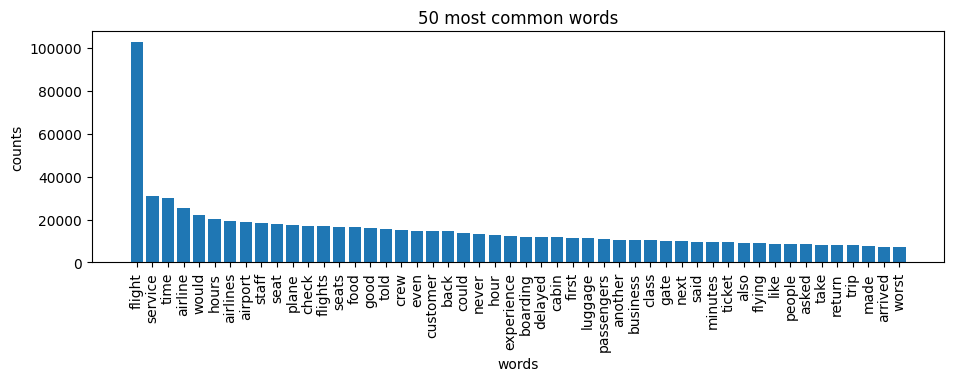

In [ ]:
#Visualising the most common words
import numpy as np
import matplotlib.pyplot as pyplot

terms = count_vectorizer.get_feature_names_out()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50] #Take the top 50 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

pyplot.figure(2, figsize=(11, 3))
pyplot.subplot(title='50 most common words')
pyplot.bar(words, counts)
pyplot.xticks(x_pos, words, rotation=90)
pyplot.xlabel('words')
pyplot.ylabel('counts')
pyplot.show()

In [ ]:
#speech tagging to use nouns only

import nltk
nltk.download('averaged_perceptron_tagger_eng')

pos_tags = nltk.pos_tag(terms)

# Getting indices of nouns only
noun_indices = [i for i, (word, tag) in enumerate(pos_tags) if tag in ['NN', 'NNS', 'NNP', 'NNPS']]

print(f"Number of noun terms found: {len(noun_indices)}")

# Filter terms and counts for nouns only
noun_terms = [terms[i] for i in noun_indices]
noun_count_data = count_data[:, noun_indices]


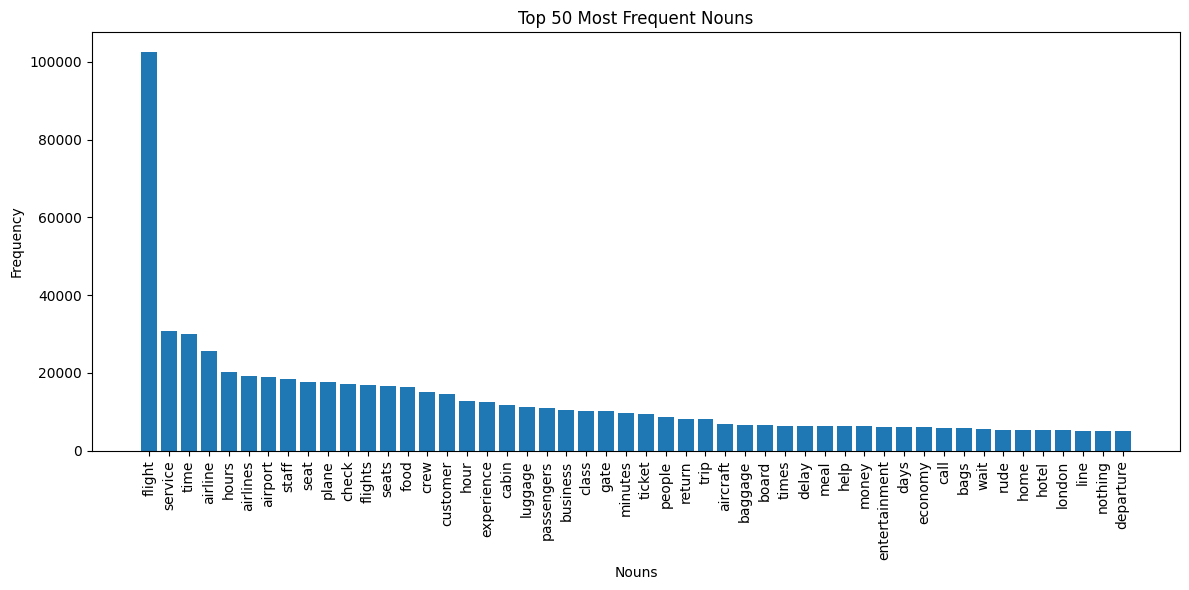

In [ ]:
#plotting the top 50 highly repeated nouns
total_noun_counts = noun_count_data.sum(axis=0).A1  # convert sparse matrix column sums to 1D array

#Pairing nouns with their counts
noun_count_pairs = list(zip(noun_terms, total_noun_counts))

#Sorting descending by count
top_50 = sorted(noun_count_pairs, key=lambda x: x[1], reverse=True)[:50]

#Separating words and counts
top_words = [w[0] for w in top_50]
top_counts = [w[1] for w in top_50]

#Plotting
pyplot.figure(figsize=(12,6))
pyplot.bar(top_words, top_counts)
plt.xticks(rotation=90)
plt.xlabel('Nouns')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Nouns')
plt.tight_layout()
plt.show()


In [ ]:
# calculating number of documents
num_docs = noun_count_data.shape[0]

# calculating document frequency for each word (number of documents containing the word)
doc_freq = (noun_count_data > 0).sum(axis=0).A1  # convert to 1D numpy array

# setting minimum document threshold (1% of documents)
min_docs = 0.01 * num_docs

# setting maximum document threshold (20% of documents)
max_docs = 0.20 * num_docs

# filtering indices of words that appear in at least 1% and at most 20% of documents
keep_indices = [i for i, df in enumerate(doc_freq) if (df >= min_docs) and (df <= max_docs)]

# printing number of terms before filtering
print(f"Terms before filtering: {len(noun_terms)}")

# printing number of terms after filtering by document frequency
print(f"Terms after filtering by document frequency: {len(keep_indices)}")

# filtering the terms list based on document frequency
filtered_terms = [noun_terms[i] for i in keep_indices]

# filtering the document-term matrix columns based on document frequency
filtered_count_data = noun_count_data[:, keep_indices]


Terms before filtering: 16717
Terms after filtering by document frequency: 399


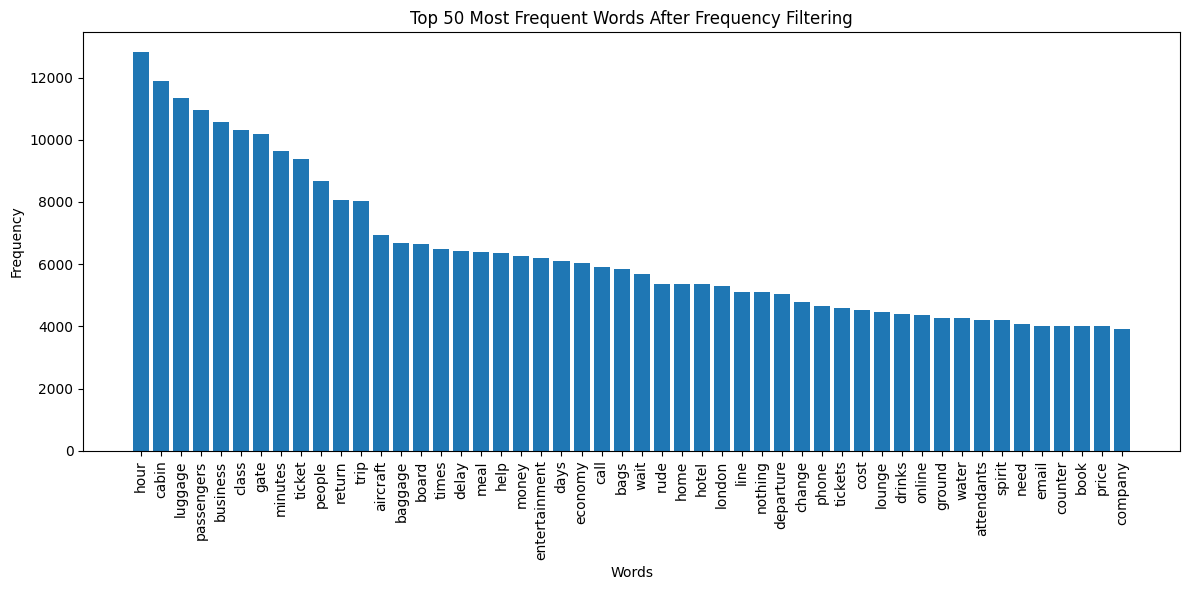

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# calculating total counts for each filtered term
total_filtered_counts = filtered_count_data.sum(axis=0).A1  # convert sparse matrix column sums to 1D array

# pairing filtered terms with their counts
filtered_count_pairs = list(zip(filtered_terms, total_filtered_counts))

# sorting descending by count and keeping top 50
top_50_filtered = sorted(filtered_count_pairs, key=lambda x: x[1], reverse=True)[:50]

# separating words and counts
top_words_filtered = [w[0] for w in top_50_filtered]
top_counts_filtered = [w[1] for w in top_50_filtered]

# plotting
plt.figure(figsize=(12,6))
plt.bar(top_words_filtered, top_counts_filtered)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Words After Frequency Filtering')
plt.tight_layout()
plt.show()


In [ ]:
#Selecting number of topics for LDA modelling
#!pip install Cython

Cleaned_doc_new = []
#print('CLEANED TEXT NEW: ')
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keep only terms included in filtered_terms
        if t in filtered_terms:
             each_item.append(t)
    Cleaned_doc_new.append(each_item)
    #print(Cleaned_doc_new[r])


In [ ]:
!#pip install gensim
import gensim.corpora as corpora

# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_new)
print(id2word.token2id)

In [ ]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]
print(Corpus)

In [ ]:
#Evaluation models with topics numbers from 2 to 50
Topics = list(range(2,21,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=Cleaned_doc_new,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Text(0, 0.5, 'Coherence')

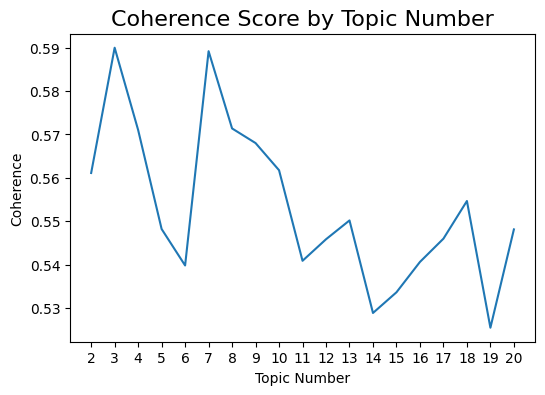

In [ ]:
pyplot.figure(figsize=(6,4))
pyplot.plot(coherence_scores)
pyplot.xticks(range(0,len(Topics)),Topics)
pyplot.title('Coherence Score by Topic Number', fontsize=16)
pyplot.xlabel('Topic Number')
pyplot.ylabel('Coherence')

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 7

lda = LDA(n_components=number_topics, n_jobs=-1, random_state=2023)
lda.fit(filtered_count_data)
#Trained LDA model
lda.components_

In [ ]:
#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(filtered_terms, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))

# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = filtered_terms
df_topic_keywords

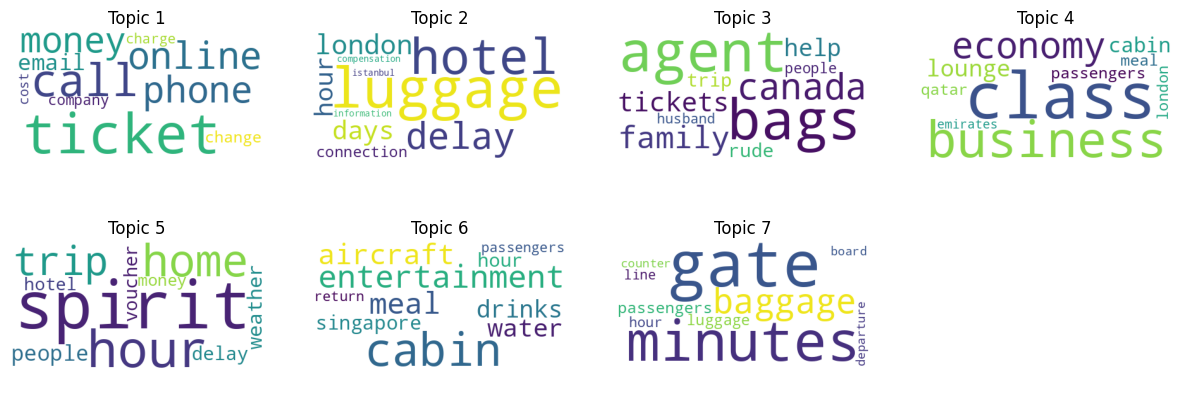

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
import math
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = pyplot.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
    count_dict = (zip(filtered_terms, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
    # convert to dictionary type - keep top 10 words
    Word_Frequency = dict(count_dict[0:10])
    # generate word cloud
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
    # visualize word cloud in figure
    subfig_Row = math.floor(topic_idx/4)
    subfig_Col = math.ceil(topic_idx%4)
    ax[subfig_Row,subfig_Col].imshow(wordcloud)
    ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1))
pyplot.show()

In [ ]:
#Compute topic distribution for each document
TopicDis_Doc = lda.transform(filtered_count_data)

#Compute overall topic distribution for all each documents
Overall_Topic_Dis = sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))
Overall_Topic_Dis

array([0.15005564, 0.10443699, 0.11141867, 0.12113883, 0.14937641,
       0.22603284, 0.13754062])

/tmp/ipython-input-3678760577.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


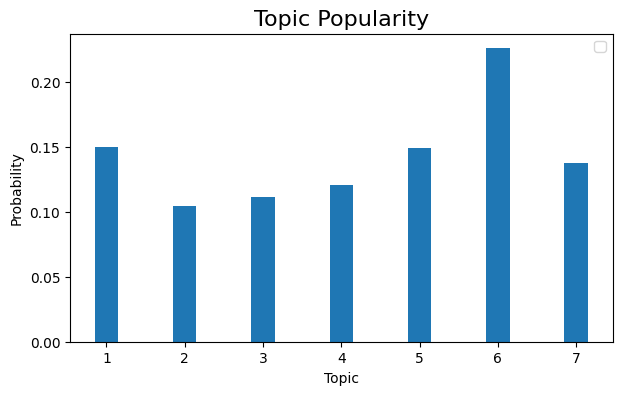

In [ ]:
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Visualize topic distributions of review groups
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Popularity', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')
pyplot.bar(Bar_index, Overall_Topic_Dis.tolist(), 0.3)
pyplot.xticks(Bar_index, Bar_index)
pyplot.legend()
pyplot.show();

In [ ]:
# View full Topic Probabilities by Document Matrix
TopicDis_Doc = lda.transform(filtered_count_data)
df_document_topics = pd.DataFrame(TopicDis_Doc)
df_document_topics

Topic Probablity distribution by Document: 
 [[0.02381694 0.02381062 0.02382409 0.02389391 0.02381409 0.85700737
  0.02383298]
 [0.00797188 0.10357109 0.07676327 0.0079622  0.0079625  0.51020066
  0.28556841]
 [0.01306086 0.01302149 0.01307827 0.01305769 0.48541548 0.44935106
  0.01301516]
 [0.00795915 0.00796895 0.00795272 0.51792999 0.00794926 0.00795309
  0.44228685]
 [0.0130195  0.0130146  0.01299813 0.92192616 0.01300823 0.01303032
  0.01300306]]


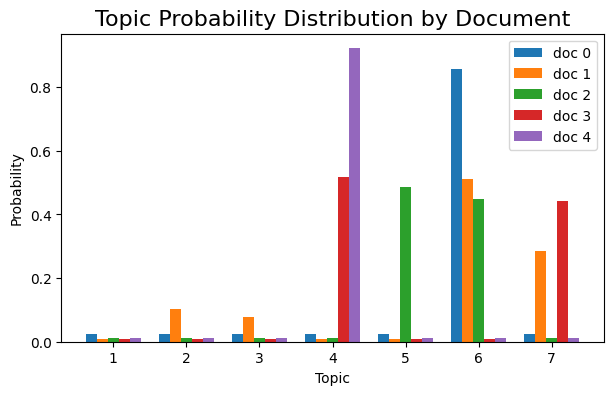

In [ ]:
# Compute the topic distribution for some reviews:
TopicDis_Doc = TopicDis_Doc[0:5]
print('Topic Probablity distribution by Document: \n', TopicDis_Doc)
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Create a new figure
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Probability Distribution by Document', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15
for i in range(0,5):
    pyplot.bar(Bar_index + i*width, TopicDis_Doc[i].tolist(), width,  label='doc ' + str(i))

pyplot.xticks(Bar_index + 2*width, Bar_index)
pyplot.legend()
pyplot.show();
#NOTE: Different Run may result in Different Graph
#due to the Randomization when training the LDA model

***The topic modeling reveals seven distinct areas of passenger concern through word cloud analysis. Topic 1 centers on booking and customer service (online, call, ticket, phone, money), Topic 2 focuses on ground operations (hotel, luggage, delay, London), Topic 3 addresses customer support interactions (agent, bags, tickets, help, Canada), Topic 4 examines cabin class experiences (economy, class, business, lounge), Topic 5 highlights operational reliability (trip, spirit, hour, delay), Topic 6 emphasizes in-flight services (aircraft, entertainment, meal, drinks, cabin), and Topic 7 covers airport operations (gate, baggage, minutes). Based on topic popularity, passengers are most concerned with in-flight experience quality (Topic 6 at 23%), followed by booking/customer service issues and operational reliability (Topics 1 and 5 at 15% each). Airport operations, cabin class differences, and ground services rank as secondary concerns (11-14% each). This indicates that while passengers value the core flight experience above all, they also prioritize reliable booking systems and on-time operations, with ground services and airport processes being important but less critical to overall satisfaction.***

**F. What are the differences in concerns and interests between passengers flying on the top three-rated airlines and the bottom three-rated airlines? Explain potential reasons for these differences. Note: you can use reviews by the top three-rated airlines together and the bottom three-rated airlines together for the analysis.**

**Top three-rated airlines sentiment analysis**

In [ ]:
# Define the three airlines of interest
selected_airlines = ['Hainan Airlines', 'ANA All Nippon Airways', 'China Southern Airlines']

# Filter the original DataFrame to include only rows with those airlines
top_df = my_df[my_df['AirlineName'].isin(selected_airlines)].copy()

# Check that Cleaned_Review column is preserved
print(top_df[['AirlineName', 'Cleaned_Review']].head())

In [ ]:
# Data cleaning and removing stop words
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
import re

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Store cleaned reviews
Cleaned_doc = []

# Loop through reviews in top_df
for review in top_df['Review']:
    try:
        # Remove non-alphabet characters
        review = re.sub('[^A-Za-z]', ' ', review)
        # Lowercase
        review = review.lower()
        # Tokenize
        tokens = review.split()
        # Remove short words
        tokens = [w for w in tokens if len(w) > 3]
        # Remove stopwords
        filtered_tokens = [w for w in tokens if w not in stop_words]
        # Join back into string
        cleaned_review = ' '.join(filtered_tokens)
    except:
        cleaned_review = ""
    Cleaned_doc.append(cleaned_review)

# Add cleaned reviews to DataFrame
top_df['Cleaned_Review'] = Cleaned_doc

# Check the result
print(top_df[['AirlineName', 'Review', 'Cleaned_Review']].head())


Number of noun terms found: 2415
Terms before filtering: 2415
Terms after filtering by document frequency: 319


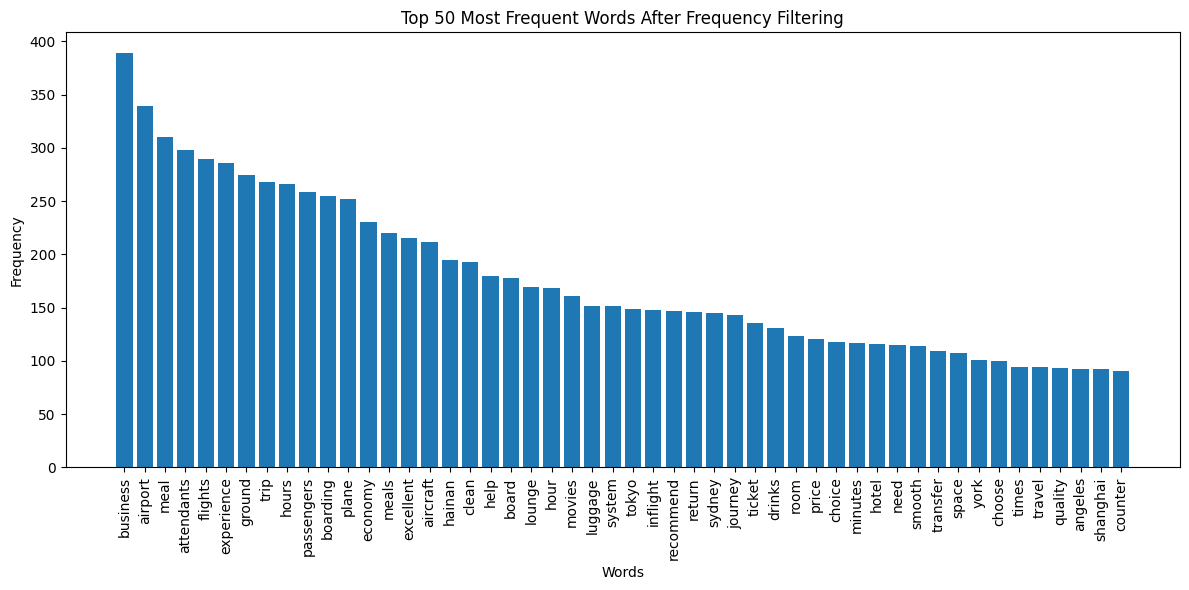

In [ ]:
#Term selection

#Creating document matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(Cleaned_doc)
count_data

#Most common words
import numpy as np
import matplotlib.pyplot as pyplot

terms = count_vectorizer.get_feature_names_out()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50] #Take the top 50 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

#speech tagging to use nouns only

import nltk
#nltk.download('averaged_perceptron_tagger_eng')

pos_tags = nltk.pos_tag(terms)

# Getting indices of nouns only
noun_indices = [i for i, (word, tag) in enumerate(pos_tags) if tag in ['NN', 'NNS', 'NNP', 'NNPS']]

print(f"Number of noun terms found: {len(noun_indices)}")

# Filter terms and counts for nouns only
noun_terms = [terms[i] for i in noun_indices]
noun_count_data = count_data[:, noun_indices]

#finding the top 50 highly repeated nouns
import matplotlib.pyplot as plt
total_noun_counts = noun_count_data.sum(axis=0).A1  # convert sparse matrix column sums to 1D array

#Pairing nouns with their counts
noun_count_pairs = list(zip(noun_terms, total_noun_counts))

#Sorting descending by count
top_50 = sorted(noun_count_pairs, key=lambda x: x[1], reverse=True)[:50]

#Separating words and counts
top_words = [w[0] for w in top_50]
top_counts = [w[1] for w in top_50]

# calculating number of documents
num_docs = noun_count_data.shape[0]

# calculating document frequency for each word (number of documents containing the word)
doc_freq = (noun_count_data > 0).sum(axis=0).A1  # convert to 1D numpy array

# setting minimum document threshold (1% of documents)
min_docs = 0.01 * num_docs

# setting maximum document threshold (20% of documents)
max_docs = 0.20 * num_docs

# filtering indices of words that appear in at least 1% and at most 20% of documents
keep_indices = [i for i, df in enumerate(doc_freq) if (df >= min_docs) and (df <= max_docs)]

# printing number of terms before filtering
print(f"Terms before filtering: {len(noun_terms)}")

# printing number of terms after filtering by document frequency
print(f"Terms after filtering by document frequency: {len(keep_indices)}")

# filtering the terms list based on document frequency
filtered_terms = [noun_terms[i] for i in keep_indices]

# filtering the document-term matrix columns based on document frequency
filtered_count_data = noun_count_data[:, keep_indices]

import numpy as np
import matplotlib.pyplot as plt

# calculating total counts for each filtered term
total_filtered_counts = filtered_count_data.sum(axis=0).A1  # convert sparse matrix column sums to 1D array

# pairing filtered terms with their counts
filtered_count_pairs = list(zip(filtered_terms, total_filtered_counts))

# sorting descending by count and keeping top 50
top_50_filtered = sorted(filtered_count_pairs, key=lambda x: x[1], reverse=True)[:50]

# separating words and counts
top_words_filtered = [w[0] for w in top_50_filtered]
top_counts_filtered = [w[1] for w in top_50_filtered]

# plotting
plt.figure(figsize=(12,6))
plt.bar(top_words_filtered, top_counts_filtered)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Words After Frequency Filtering')
plt.tight_layout()
plt.show()



In [ ]:
#Selecting number of topics for LDA modelling

#!pip install Cython

Cleaned_doc_new = []
#print('CLEANED TEXT NEW: ')
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keep only terms included in filtered_terms
        if t in filtered_terms:
             each_item.append(t)
    Cleaned_doc_new.append(each_item)
    #print(Cleaned_doc_new[r])

!#pip install gensim
import gensim.corpora as corpora

# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_new)
print(id2word.token2id)

#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]
print(Corpus)

In [ ]:
#Evaluation models with topics numbers from 2 to 50
Topics = list(range(2,21,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=Cleaned_doc_new,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Text(0, 0.5, 'Coherence')

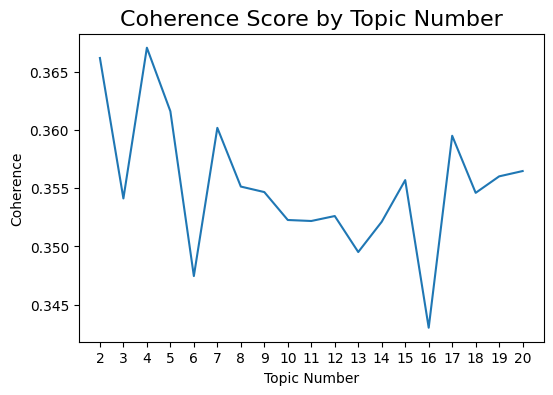

In [ ]:
pyplot.figure(figsize=(6,4))
pyplot.plot(coherence_scores)
pyplot.xticks(range(0,len(Topics)),Topics)
pyplot.title('Coherence Score by Topic Number', fontsize=16)
pyplot.xlabel('Topic Number')
pyplot.ylabel('Coherence')

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 4

lda = LDA(n_components=number_topics, n_jobs=-1, random_state=2023)
lda.fit(filtered_count_data)
#Trained LDA model
lda.components_

#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(filtered_terms, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))

# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = filtered_terms
df_topic_keywords


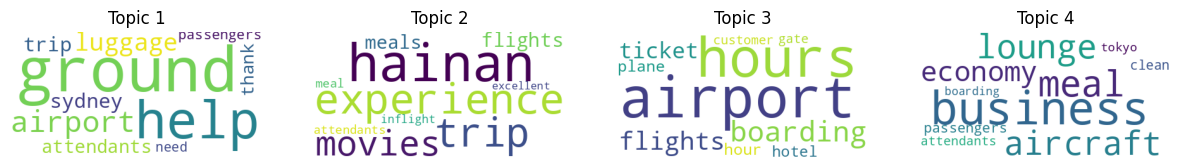

In [ ]:
#!pip install wordcloud

from wordcloud import WordCloud
import math
import matplotlib.pyplot as pyplot # Use pyplot here as well for consistency

rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = pyplot.subplots(rows, 4, figsize=(15,2.5*rows))

# Adjust indexing based on the number of rows
if rows == 1:
    [axi.set_axis_off() for axi in ax.ravel()]
    for topic_idx, topic in enumerate(Word_Topics_Pro):
        count_dict = (zip(filtered_terms, topic))
        count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
        # convert to dictionary type - keep top 10 words
        Word_Frequency = dict(count_dict[0:10])
        # generate word cloud
        wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
        # visualize word cloud in figure
        subfig_Col = math.ceil(topic_idx%4)
        ax[subfig_Col].imshow(wordcloud) # Use single index for 1D array
        ax[subfig_Col].set_title("Topic {}".format(topic_idx+1))
else:
    [axi.set_axis_off() for axi in ax.ravel()]
    for topic_idx, topic in enumerate(Word_Topics_Pro):
        count_dict = (zip(filtered_terms, topic))
        count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
        # convert to dictionary type - keep top 10 words
        Word_Frequency = dict(count_dict[0:10])
        # generate word cloud
        wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
        # visualize word cloud in figure
        subfig_Row = math.floor(topic_idx/4)
        subfig_Col = math.ceil(topic_idx%4)
        ax[subfig_Row,subfig_Col].imshow(wordcloud)
        ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1))

pyplot.show()

/tmp/ipython-input-3742197412.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


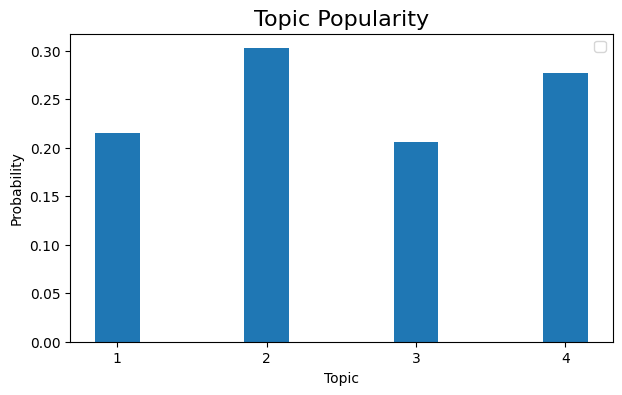

Topic Probablity distribution by Document: 
 [[0.03381188 0.89919944 0.03347999 0.03350869]
 [0.01688444 0.29950657 0.66651965 0.01708934]
 [0.47591886 0.1535648  0.35412533 0.01639101]
 [0.01907314 0.01864002 0.01837585 0.94391099]
 [0.69769485 0.03631834 0.23027069 0.03571613]]


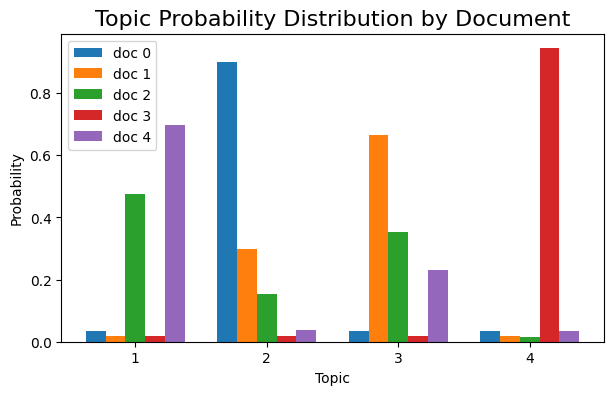

In [ ]:
#Compute topic distribution for each document
TopicDis_Doc = lda.transform(filtered_count_data)

#Compute overall topic distribution for all each documents
Overall_Topic_Dis = sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))
Overall_Topic_Dis

# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Visualize topic distributions of review groups
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Popularity', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')
pyplot.bar(Bar_index, Overall_Topic_Dis.tolist(), 0.3)
pyplot.xticks(Bar_index, Bar_index)
pyplot.legend()
pyplot.show();

# View full Topic Probabilities by Document Matrix
TopicDis_Doc = lda.transform(filtered_count_data)
df_document_topics = pd.DataFrame(TopicDis_Doc)
df_document_topics


# Compute the topic distribution for some reviews:
TopicDis_Doc = TopicDis_Doc[0:5]
print('Topic Probablity distribution by Document: \n', TopicDis_Doc)
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Create a new figure
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Probability Distribution by Document', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15
for i in range(0,5):
    pyplot.bar(Bar_index + i*width, TopicDis_Doc[i].tolist(), width,  label='doc ' + str(i))

pyplot.xticks(Bar_index + 2*width, Bar_index)
pyplot.legend()
pyplot.show();
#NOTE: Different Run may result in Different Graph
#due to the Randomization when training the LDA model

***Based on the topic modeling analysis for the top 3-rated airlines, passengers demonstrate distinct discussion patterns across four key areas. Topic 1 focuses on ground services and assistance (ground, help, trip, luggage, passengers, Sydney, airport, attendants), Topic 2 centers on premium airline experiences with Hainan Airlines prominence (hainan, meals, experience, excellent, movies, trip, inflight), Topic 3 addresses operational aspects (ticket, hours, airport, flights, plane, boarding, hotel), and Topic 4 emphasizes premium cabin services (lounge, Tokyo, economy, meal, business, boarding, passengers, attendants, aircraft, clean). The topic popularity reveals that passengers of top-rated airlines are most concerned with premium airline experiences (Topic 2 at 31%), followed closely by premium cabin services (Topic 4 at 28%), while ground services and operational aspects receive moderate attention at 22% and 21% respectively. This distribution indicates that passengers flying with highly-rated airlines focus primarily on service excellence, premium amenities, and quality experiences rather than basic operational issues. The prominence of words like "excellent," "lounge," "clean," and specific mentions of premium carriers like Hainan Airlines suggests these passengers expect and discuss high-quality service standards, in-flight entertainment, meal quality, and cabin comfort as primary concerns, reflecting their elevated expectations and satisfaction with premium service delivery rather than fundamental functionality problems.***

**Bottom three-rated airlines sentiment analysis**

In [ ]:
# Define the three airlines of interest
selected_airlines = ['VivaAerobús', 'Volaris', 'Frontier Airlines']

# Filter the original DataFrame to include only rows with those airlines
bottom_df = my_df[my_df['AirlineName'].isin(selected_airlines)].copy()

# Check that Cleaned_Review column is preserved
print(bottom_df[['AirlineName', 'Cleaned_Review']].head())

In [ ]:
# Data cleaning and removing stop words
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
import re

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Store cleaned reviews
Cleaned_doc = []

# Loop through reviews in bottom_df
for review in bottom_df['Review']:
    try:
        # Remove non-alphabet characters
        review = re.sub('[^A-Za-z]', ' ', review)
        # Lowercase
        review = review.lower()
        # Tokenize
        tokens = review.split()
        # Remove short words
        tokens = [w for w in tokens if len(w) > 3]
        # Remove stopwords
        filtered_tokens = [w for w in tokens if w not in stop_words]
        # Join back into string
        cleaned_review = ' '.join(filtered_tokens)
    except:
        cleaned_review = ""
    Cleaned_doc.append(cleaned_review)

# Add cleaned reviews to DataFrame
bottom_df['Cleaned_Review'] = Cleaned_doc

# Check the result
print(bottom_df[['AirlineName', 'Review', 'Cleaned_Review']].head())


Number of noun terms found: 3203
Terms before filtering: 3203
Terms after filtering by document frequency: 367


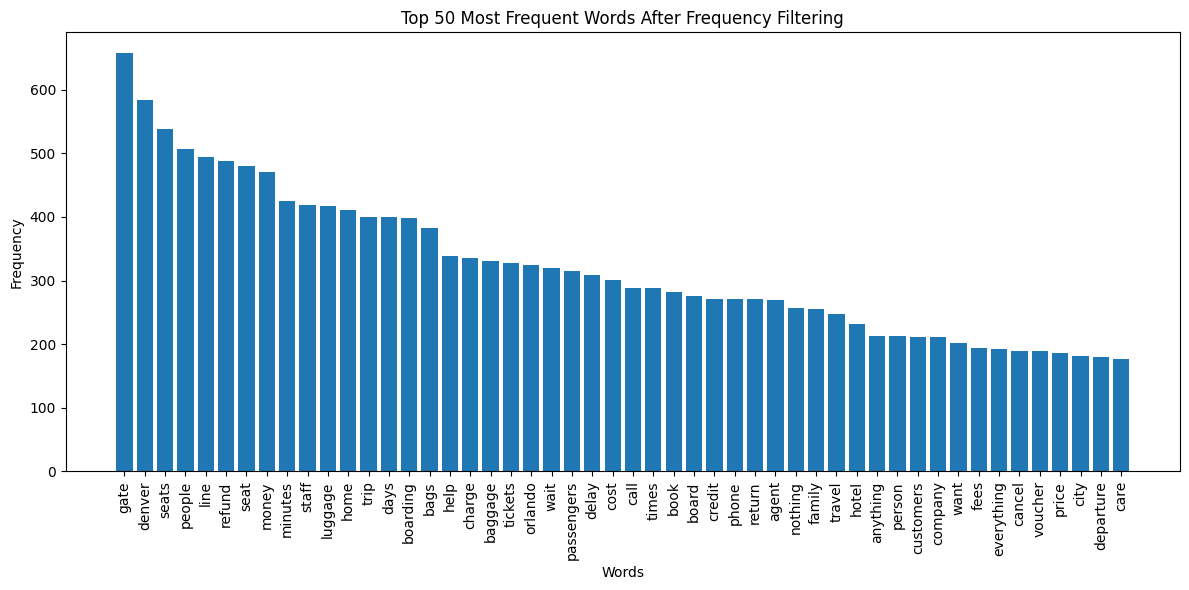

In [ ]:
#Term selection

#Creating document matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(Cleaned_doc)
count_data

#Most common words
import numpy as np
import matplotlib.pyplot as pyplot

terms = count_vectorizer.get_feature_names_out()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50] #Take the top 50 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

#speech tagging to use nouns only

import nltk
#nltk.download('averaged_perceptron_tagger_eng')

pos_tags = nltk.pos_tag(terms)

# Getting indices of nouns only
noun_indices = [i for i, (word, tag) in enumerate(pos_tags) if tag in ['NN', 'NNS', 'NNP', 'NNPS']]

print(f"Number of noun terms found: {len(noun_indices)}")

# Filter terms and counts for nouns only
noun_terms = [terms[i] for i in noun_indices]
noun_count_data = count_data[:, noun_indices]

#finding the top 50 highly repeated nouns
import matplotlib.pyplot as plt
total_noun_counts = noun_count_data.sum(axis=0).A1  # convert sparse matrix column sums to 1D array

#Pairing nouns with their counts
noun_count_pairs = list(zip(noun_terms, total_noun_counts))

#Sorting descending by count
top_50 = sorted(noun_count_pairs, key=lambda x: x[1], reverse=True)[:50]

#Separating words and counts
top_words = [w[0] for w in top_50]
top_counts = [w[1] for w in top_50]

# calculating number of documents
num_docs = noun_count_data.shape[0]

# calculating document frequency for each word (number of documents containing the word)
doc_freq = (noun_count_data > 0).sum(axis=0).A1  # convert to 1D numpy array

# setting minimum document threshold (1% of documents)
min_docs = 0.01 * num_docs

# setting maximum document threshold (20% of documents)
max_docs = 0.20 * num_docs

# filtering indices of words that appear in at least 1% and at most 20% of documents
keep_indices = [i for i, df in enumerate(doc_freq) if (df >= min_docs) and (df <= max_docs)]

# printing number of terms before filtering
print(f"Terms before filtering: {len(noun_terms)}")

# printing number of terms after filtering by document frequency
print(f"Terms after filtering by document frequency: {len(keep_indices)}")

# filtering the terms list based on document frequency
filtered_terms = [noun_terms[i] for i in keep_indices]

# filtering the document-term matrix columns based on document frequency
filtered_count_data = noun_count_data[:, keep_indices]

import numpy as np
import matplotlib.pyplot as plt

# calculating total counts for each filtered term
total_filtered_counts = filtered_count_data.sum(axis=0).A1  # convert sparse matrix column sums to 1D array

# pairing filtered terms with their counts
filtered_count_pairs = list(zip(filtered_terms, total_filtered_counts))

# sorting descending by count and keeping top 50
top_50_filtered = sorted(filtered_count_pairs, key=lambda x: x[1], reverse=True)[:50]

# separating words and counts
top_words_filtered = [w[0] for w in top_50_filtered]
top_counts_filtered = [w[1] for w in top_50_filtered]

# plotting
plt.figure(figsize=(12,6))
plt.bar(top_words_filtered, top_counts_filtered)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Words After Frequency Filtering')
plt.tight_layout()
plt.show()



In [ ]:
#Selecting number of topics for LDA modelling

#!pip install Cython

Cleaned_doc_new = []
#print('CLEANED TEXT NEW: ')
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keep only terms included in filtered_terms
        if t in filtered_terms:
             each_item.append(t)
    Cleaned_doc_new.append(each_item)
    #print(Cleaned_doc_new[r])

!#pip install gensim
import gensim.corpora as corpora

# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_new)
print(id2word.token2id)

#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]
print(Corpus)

In [ ]:
#Evaluation models with topics numbers from 2 to 50
Topics = list(range(2,21,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=Cleaned_doc_new,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Text(0, 0.5, 'Coherence')

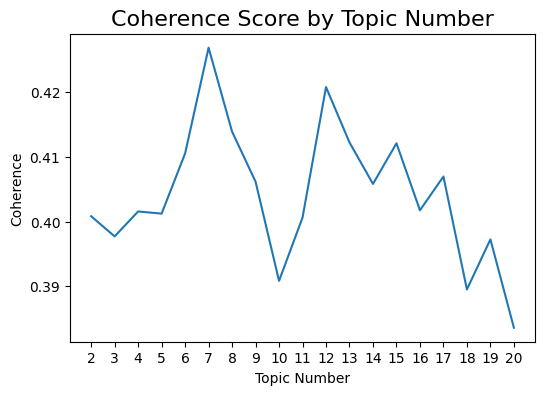

In [ ]:
pyplot.figure(figsize=(6,4))
pyplot.plot(coherence_scores)
pyplot.xticks(range(0,len(Topics)),Topics)
pyplot.title('Coherence Score by Topic Number', fontsize=16)
pyplot.xlabel('Topic Number')
pyplot.ylabel('Coherence')

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 7

lda = LDA(n_components=number_topics, n_jobs=-1, random_state=2023)
lda.fit(filtered_count_data)
#Trained LDA model
lda.components_

#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(filtered_terms, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))

# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = filtered_terms
df_topic_keywords


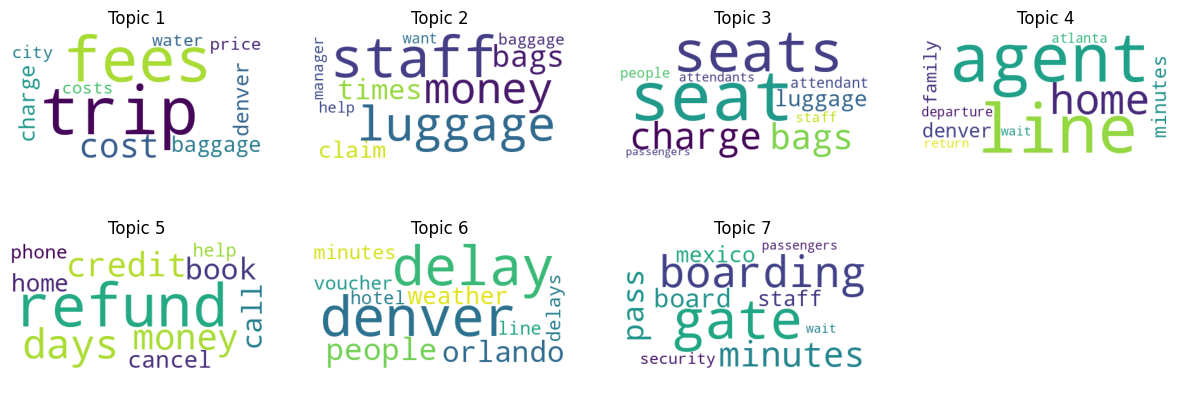

In [ ]:
#!pip install wordcloud

from wordcloud import WordCloud
import math
import matplotlib.pyplot as pyplot # Use pyplot here as well for consistency

rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = pyplot.subplots(rows, 4, figsize=(15,2.5*rows))

# Adjust indexing based on the number of rows
if rows == 1:
    [axi.set_axis_off() for axi in ax.ravel()]
    for topic_idx, topic in enumerate(Word_Topics_Pro):
        count_dict = (zip(filtered_terms, topic))
        count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
        # convert to dictionary type - keep top 10 words
        Word_Frequency = dict(count_dict[0:10])
        # generate word cloud
        wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
        # visualize word cloud in figure
        subfig_Col = math.ceil(topic_idx%4)
        ax[subfig_Col].imshow(wordcloud) # Use single index for 1D array
        ax[subfig_Col].set_title("Topic {}".format(topic_idx+1))
else:
    [axi.set_axis_off() for axi in ax.ravel()]
    for topic_idx, topic in enumerate(Word_Topics_Pro):
        count_dict = (zip(filtered_terms, topic))
        count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
        # convert to dictionary type - keep top 10 words
        Word_Frequency = dict(count_dict[0:10])
        # generate word cloud
        wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
        # visualize word cloud in figure
        subfig_Row = math.floor(topic_idx/4)
        subfig_Col = math.ceil(topic_idx%4)
        ax[subfig_Row,subfig_Col].imshow(wordcloud)
        ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1))

pyplot.show()

/tmp/ipython-input-3742197412.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


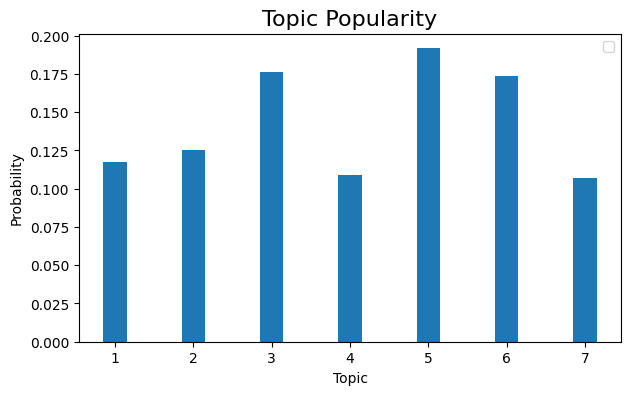

Topic Probablity distribution by Document: 
 [[0.22337752 0.00652108 0.53514091 0.21538792 0.00652273 0.00651354
  0.00653631]
 [0.02043604 0.02050628 0.02047809 0.02045223 0.02055271 0.87713547
  0.02043917]
 [0.013014   0.0130552  0.92179661 0.01301035 0.01302245 0.01305869
  0.01304271]
 [0.01433711 0.01430337 0.59823498 0.33013082 0.01430006 0.0143609
  0.01433276]
 [0.00554811 0.00551716 0.00551982 0.00550892 0.17644853 0.34285584
  0.45860161]]


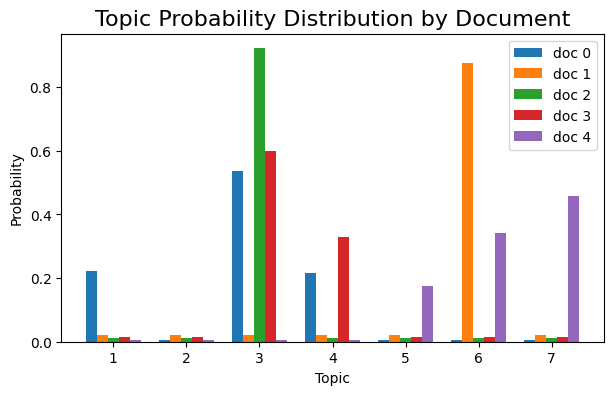

In [ ]:
#Compute topic distribution for each document
TopicDis_Doc = lda.transform(filtered_count_data)

#Compute overall topic distribution for all each documents
Overall_Topic_Dis = sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))
Overall_Topic_Dis

# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Visualize topic distributions of review groups
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Popularity', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')
pyplot.bar(Bar_index, Overall_Topic_Dis.tolist(), 0.3)
pyplot.xticks(Bar_index, Bar_index)
pyplot.legend()
pyplot.show();

# View full Topic Probabilities by Document Matrix
TopicDis_Doc = lda.transform(filtered_count_data)
df_document_topics = pd.DataFrame(TopicDis_Doc)
df_document_topics


# Compute the topic distribution for some reviews:
TopicDis_Doc = TopicDis_Doc[0:5]
print('Topic Probablity distribution by Document: \n', TopicDis_Doc)
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Create a new figure
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Probability Distribution by Document', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15
for i in range(0,5):
    pyplot.bar(Bar_index + i*width, TopicDis_Doc[i].tolist(), width,  label='doc ' + str(i))

pyplot.xticks(Bar_index + 2*width, Bar_index)
pyplot.legend()
pyplot.show();
#NOTE: Different Run may result in Different Graph
#due to the Randomization when training the LDA model

***Based on the topic modeling analysis for the bottom 3-rated airlines, passengers demonstrate significantly different discussion patterns focused on operational problems and service failures. Topic 1 centers on cost and baggage issues (fees, trip, cost, baggage, city, water, price, charge), Topic 2 addresses staffing and luggage problems (staff, want, baggage, bags, money, luggage, claim, help), Topic 3 focuses on seating and service complaints (seats, seat, charge, bags, people, attendant, luggage, staff), Topic 4 covers customer service failures (agent, home, line, family, departure, denver, wait, minutes), Topic 5 emphasizes refund and cancellation issues (refund, book, credit, help, phone, home, days, money, cancel), Topic 6 highlights operational delays (delay, denver, people, orlando, minutes, voucher, hotel, weather, days), and Topic 7 deals with boarding and gate problems (boarding, pass, board, staff, gate, minutes, security, wait). The topic popularity shows passengers are most concerned with operational delays (Topic 5 at 19%) and boarding/gate issues (Topic 6 at 17%), followed by seating problems (Topic 3 at 18%). Unlike top-rated airlines where passengers discuss premium experiences and service excellence, bottom-rated airline passengers focus primarily on basic operational failures, financial disputes, customer service breakdowns, and systemic problems like delays, cancellations, hidden fees, and poor staff interactions, reflecting their frustration with fundamental service delivery rather than quality enhancement expectations.***

<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication





***The comprehensive analysis of airline reviews reveals critical practical implications for industry stakeholders across multiple operational dimensions. For airline management, the data demonstrates a clear performance hierarchy where success depends on mastering operational fundamentals before pursuing premium differentiation - bottom-rated airlines must prioritize fixing basic issues like baggage handling, delay management, transparent pricing, staff training, and refund processes, while top-rated carriers can leverage their operational excellence to compete on premium amenities like lounge access, superior meals, and entertainment systems. The stark contrast between topic discussions (operational failures versus premium experiences) and the overall low satisfaction scores (3.91/10) indicate that most airlines are failing to meet baseline passenger expectations, particularly in critical areas like WiFi (0.67/5), entertainment (1.52/5), and food quality (1.88/5). For investors and industry analysts, the data reveals that volume-based metrics can be misleading - high-traffic carriers like American Airlines and United generate large positive sentiment counts but may still have poor satisfaction ratios, while smaller premium carriers achieve superior ratings with focused service delivery. The COVID-19 impact on previously stable performers like Qantas demonstrates how external shocks can rapidly erode carefully built reputations, emphasizing the importance of crisis management and service recovery strategies. Most importantly, the 52% negative sentiment rate and over 35,000 negative recommendations suggest an industry-wide customer experience crisis that creates competitive opportunities for airlines willing to invest in systematic service improvements, operational reliability, and transparent customer communication rather than just marketing and promotional efforts.***

### References:


ChatGPT (OpenAI)

OpenAI. (2024). ChatGPT (GPT-4o) [Large language model]. https://chat.openai.com/

Google Gemini

Google DeepMind. (2024). Gemini [Large language model]. https://deepmind.google/technologies/gemini/

Claude (Anthropic)

Anthropic. (2024). Claude [Large language model]. https://www.anthropic.com/index/claude